## Telecom Churn Case Study 

##### Group Members: 
1. Rupesh Poojary
2. Vijayant Kumar

# **<font color='blue'>1. Understanding of Business</font>**

## 1.1 Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of `15-25% annual churn rate`. It costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is even more important than customer acquisition. 

## 1.2 Business Objective

To `reduce customer churn`, telecom companies need to predict which customers are at high risk of churn. The business objective is to predict the churn for prepaid customers in the last (i.e. the ninth) month using the data (features) from the first three months.

### 1.2.1 Customer behaviour during churn

Following customer behaviour is the basis of churn detection strategy.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, following three phases of customer lifecycle are considered

<font color='green'>**The ‘good’ phase**:</font> In this phase, the customer is happy with the service and behaves as usual.

<font color='orange'>**The ‘action’ phase**:</font> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

<font color='red'>**The ‘churn’ phase**:</font> In this phase, the customer is said to have churned. Churn is defined based on this phase.

### 1.2.2 Churn detection strategy

***High-value Churn*** : In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus with reduction of high-value customers churn, business will be able to reduce significant revenue leakage.

***Usage-based churn***: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time are termed as churned customers


#### Import Libraries and load data from CSV file

In [320]:
##Importing all the required libraris
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

###SKLearn modelling
from sklearn import model_selection, preprocessing,metrics
#from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split,KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_selection import RFE # to calculate RFE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score,roc_auc_score,classification_report,balanced_accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from imblearn.ensemble import RUSBoostClassifier
from sklearn.svm import SVC
from scipy import stats

#import statsmodels.api as sm  
from collections import Counter

###XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')


In [321]:
# set the display parameters to show more rows and columns
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
telecom = pd.read_csv('telecom_churn_data.csv') # read the telecom customer data to dataframe

In [322]:
telecom.head(10)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   
5     7000286308        109             0.0             0.0             0.0   
6     7001051193        109             0.0             0.0             0.0   
7     7000701601        109             0.0             0.0             0.0   
8     7001524846        109             0.0             0.0             0.0   
9     7001864400        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   
5            6/30/2014            7/31/2014            8/31/2014   
6            6/30/2014            7/31/2014            8/31/2014   
7            6/30/2014            7/31/2014            8/31/2014   
8            6/30/2014            7/31/2014            8/31/2014   
9            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014   197.385   214.816   213.803   21.100          NaN   
1            9/30/2014    34.047   355.074   268.321   86.285        24.11   
2            9/30/2014   167.690   189.058   210.226  290.714        11.54   
3            9/30/2014   221.338   251.102   508.054  389.500        99.91   
4            9/30/2014   261.636   309.876   238.174  163.426        50.31   
5            9/30/2014    50.258    58.810    83.386  170.826        50.16   
6            9/30/2014   429.023   190.704   255.114  114.751        71.03   
7            9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8            9/30/2014   378.721   492.223   137.362  166.787       413.69   
9            9/30/2014   119.518   247.435   170.231  160.042        33.89   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   
5        43.63        85.48       138.79         19.28         13.44   
6        45.03        76.66        15.23        262.73         49.24   
7        54.68        52.29          NaN        453.43        567.16   
8       351.03        35.08        33.46         94.66         80.63   
9        30.11        22.43        27.84         63.48         54.16   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76           0.00           0.00           0.00   
2        208.36        118.91           0.00           0.00           0.00   
3         71.68        113.54           0.00          54.86          44.38   
4        124.26         45.81           0.00           0.00           0.00   
5         14.46         46.91           0.00           0.00           0.00   
6         92.08         50.33           0.00           0.00           0.00   
7        325.91           NaN          16.23          33.49          31.64   
8        136.48        108.71 

In [323]:
print("Shape of the DataFrame:",telecom.shape,"\n") ## (99999, 226) 
#telecom.info(max_cols=300)

Shape of the DataFrame: (99999, 226) 



In [324]:
HV_telecom=telecom.copy()

# **<font color='blue'>2. Data Understanding & Pre-processing</font>**

###  2.1 Check null and NaN values in each column

In [325]:
round((((HV_telecom.isnull() | HV_telecom.isna()).sum()/HV_telecom.shape[0])*100).sort_values(ascending=False),2).head(35)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### **<font color='green'> Analysis:</font>**
- Based on missing values, it seems there are huge set of customers who are not using below features and hence data is not available for their related columns:
1. **2g or 3g data** (i.e.: arpu_3g_6/7/8, count_rech_3g_6/7/8, arpu_2g_6/7/8, count_rech_2g_6/7/8, max_rech_data_6/7/8, total_rech_data_6/7/8, date_of_last_rech_data_6/7/8 etc...)
2. **fb** (fb_user_6/7/8)
3. **Night pack** (night_pck_user_6/7/8)

In [326]:
HV_telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

#### **<font color='blue'>Definition of the Common Reusable functions </font>**

**dist_prob_plot**: This function is used to plot Distribution plots <br>
**mscatterplot**: This Function is to draw Scatterplots for all the columns provided for a dataframe<br>
**datarech_col_validation**: This function is to validate data columns for average and max values<br>

In [327]:
# Distribution Plots
def dist_prob_plot(feature_name,all_months=False):
    '''
    Function for Distribution and Probability Plots 
    Parameters: feature_name which needs to be analyzed
    Returns: Distibution Plot and Probabilty Plot
    '''
    plt.figure(figsize=(25,4))
    
    ###6th Month
    plt.subplot(1,6,1)
    sns.distplot(HV_telecom[feature_name].dropna() ,kde=False, fit=stats.norm)
    plt.title(feature_name + ' - ' + 'Distribution Plot')
    plt.subplot(1,6,2)
    _=stats.probplot(HV_telecom[feature_name].dropna(), plot=plt)
    plt.title(feature_name + ' - ' + 'Probabiity Plot')
    
    ###7th Month
    new_f = feature_name[:-2]+'_7'
    plt.subplot(1,6,3)
    sns.distplot(HV_telecom[new_f].dropna(),kde=False , fit=stats.norm)
    plt.title(new_f + ' - ' + 'Distribution Plot')
    plt.subplot(1,6,4)
    _=stats.probplot(HV_telecom[new_f].dropna(), plot=plt)
    plt.title(new_f + ' - ' + 'Probabiity Plot')
    
    ###8th Month
    new_f = feature_name[:-2]+'_8'
    plt.subplot(1,6,5)
    sns.distplot(HV_telecom[new_f].dropna(),kde=False , fit=stats.norm)
    plt.title(new_f + ' - ' + 'Distribution Plot')
    plt.subplot(1,6,6)
    _=stats.probplot(HV_telecom[new_f].dropna(), plot=plt)
    plt.title(new_f + ' - ' + 'Probabiity Plot')
    
    plt.tight_layout()
    plt.show()
    
##*************************************************************************************************************************************##    
    
def mscatterplot(df,x_colname,y_colname,hue_colname,pltnum,listlen):
    '''
    Function is to draw Scatterplots for all the columns provided for a dataframe
    Parameters:
    -df: Dataframe name
    -x_colname: Column Name for X-axis
    -y_colname: Column Name for y-axis
    -hue-colname: Column Name for hue
    -pltnum: Plot Number
    -listlen: Total length of list
    
    Returns: None
    '''
    coln = 5
    rown = listlen//coln + 1
    plt.subplot(rown,coln,pltnum)
    #sns.boxplot(x = x_colname, y = y_colname, data = df)
    #sns.jointplot(x = x_colname, y = y_colname, data = df)
    sns.scatterplot(x = x_colname, y=y_colname,hue = hue_colname, data = df)
    plt.xticks(rotation=45)   
    #plt.tight_layout()
    #plt.show()
    
##*************************************************************************************************************************************##  

def datarech_col_validation(df,col1,col2,col3):
    '''
    Function is to validate data columns for average and max values
    Parameters:
    - df: Dataframe
    - col1, col2: Two columns which need to be compared for values
    - col3: Extra column to use to display relavent information
    '''
    count_1 = 0
    count_2 = 0
    count_3 = 0
    for l in range(0,len(df[col1])):
        if df[col1][l] > df[col2][l]:
            count_1+=1
        elif df[col1][l] < df[col2][l]:
            count_2+=1
            #if count_2 == 10:
            #    print(col1," : ",df[col1][l])
            #    print(col2," : ",df[col2][l])
            #    print(col3," : ",df[col3][l])
        elif df[col1][l] == df[col2][l]:
            count_3+=1
            
    print("Count of", col1, " > " , col2 , ":" ,count_1)
    print("Count of", col1, " < " , col2 , ":" ,count_2)
    print("Count of", col1, " = " , col2 , ":" ,count_3)
    
    
##*************************************************************************************************************************************## 
def model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred):
    '''
    Function is used for model evaluation using common scoring metrics
    y_train, y_train_ped : Actual and predicted values of training set
    y_test,y_test_pred : Actual and predicted values of test set
    
    '''
    
    print('\n------------Recall/Sensitivity (Churn Prediction Accuracy) score------------')
    print('train set:', round(recall_score(y_train, y_train_pred),3))
    print('Test set:',  round(recall_score(y_test, y_test_pred),3))

    print('\n------------Specificity (Non Churn Prediction Accuracy) score------------')
    tn1, fp1, fn1, tp1 = confusion_matrix(y_train, y_train_pred).ravel()
    tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_test_pred).ravel()
    print('train set:', round((tn1/(tn1+fp1)),3))
    print('test set:', round((tn2/(tn2+fp2)),3))
        
    print('\n------------Precision score------------')
    print('train set:', round(precision_score(y_train, y_train_pred),3))
    print('test set:',  round(precision_score(y_test, y_test_pred),3))
    
    print('\n------------F1 score------------')
    print('train set:', round(f1_score(y_train, y_train_pred),3))
    print('test set:',  round(f1_score(y_test, y_test_pred),3))
    
    print('\n------------Accuracy score------------')
    print('train set:', round(accuracy_score(y_train, y_train_pred),3))
    print('Test set:',  round(accuracy_score(y_test, y_test_pred),3))
    
    print('\n------------Confusion Matrix------------')
    
    plt.figure(figsize=(8, 2))    
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred, normalize='true'), annot=True, cbar=False)
    plt.ylabel('Actual churn')   
    plt.xlabel('Predicted churn')
    plt.title('Training set')
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred, normalize='true'), annot=True, cbar=False)
    plt.ylabel('Actual churn')   
    plt.xlabel('Predicted churn')
    plt.title('Test set')

# **<font color='blue'> 3. Data Cleanup</font>**

## 3.1 Check unique values of all the columns and identify if any columns can be dropped

In [328]:
#HV_telecom.nunique().sort_values(ascending=True).index
uni_val = pd.DataFrame(HV_telecom.nunique().sort_values(ascending=True)).reset_index()
uni_val.columns = ['column_name','unique_values']

categorical_featurelist = uni_val.loc[uni_val['unique_values']<20]['column_name'].to_list()

In [329]:
for f in categorical_featurelist:
    print(100*HV_telecom[f].value_counts(normalize=True,dropna=False))
    print('\n')    

0.0    96.062961
NaN     3.937039
Name: std_ic_t2o_mou_6, dtype: float64


0.0    94.621946
NaN     5.378054
Name: std_og_t2c_mou_8, dtype: float64


0.0    92.254923
NaN     7.745077
Name: std_og_t2c_mou_9, dtype: float64


0.0    92.254923
NaN     7.745077
Name: std_ic_t2o_mou_9, dtype: float64


0.0    94.621946
NaN     5.378054
Name: std_ic_t2o_mou_8, dtype: float64


0.0    96.140961
NaN     3.859039
Name: std_og_t2c_mou_7, dtype: float64


0.0    96.140961
NaN     3.859039
Name: std_ic_t2o_mou_7, dtype: float64


9/30/2014    98.340983
NaN           1.659017
Name: last_date_of_month_9, dtype: float64


0.0    96.062961
NaN     3.937039
Name: std_og_t2c_mou_6, dtype: float64


7/31/2014    99.398994
NaN           0.601006
Name: last_date_of_month_7, dtype: float64


109    100.0
Name: circle_id, dtype: float64


0.0    98.98199
NaN     1.01801
Name: loc_og_t2o_mou, dtype: float64


0.0    98.98199
NaN     1.01801
Name: std_og_t2o_mou, dtype: float64


0.0    98.98199
NaN     1.018

### Below columns have only one value (or NaN) for all the rows so dropping them

'std_ic_t2o_mou_6', 'std_og_t2c_mou_8','std_ic_t2o_mou_7','std_ic_t2o_mou_8',
'std_og_t2c_mou_7', 'last_date_of_month_8', 'std_og_t2c_mou_6','last_date_of_month_6',
'loc_ic_t2o_mou','std_og_t2o_mou','loc_og_t2o_mou','circle_id','last_date_of_month_7'

In [330]:
list(HV_telecom.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [331]:
cols_to_drop = ['std_ic_t2o_mou_6', 'std_og_t2c_mou_6','std_ic_t2o_mou_7','std_og_t2c_mou_7',
                'std_ic_t2o_mou_8','std_og_t2c_mou_8','std_og_t2o_mou',
                'last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                'loc_ic_t2o_mou','loc_og_t2o_mou','circle_id','mobile_number']

HV_telecom.drop(columns=cols_to_drop,inplace=True)
HV_telecom.shape

(99999, 212)

## 3.2 Check column names consistency

In [332]:
## Rename below columns for consistency purpose
HV_telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                             'jul_vbc_3g':'vbc_3g_7',
                             'aug_vbc_3g':'vbc_3g_8',}, inplace=True)

##### `av_rech_amt_data_6/7/8` columns look like total recharge amount for data and `max_rech_data_6/7/8` columns look like max recharge amount for data so renaming the same

## 3.3 Impute missing values
- Impute numerical values with 0 for Numerical columns
- Impute 0 as new category for Categorical columns (and will drop this new category during Dummy creation)

#### Below columns are categorical columns:
1. night_pck_user_6, night_pck_user_7, night_pck_user_8
2. fb_user_6, fb_user_7, fb_user_8
3. monthly_3g_6, monthly_3g_7, monthly_3g_8 
4. monthly_2g_6, monthly_2g_7, monthly_2g_8

In [333]:
night_pck_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']
HV_telecom[night_pck_cols] = HV_telecom[night_pck_cols].fillna(value=0, axis=1) ## Nan is corresponding to users not using night pack

fb_user_cols = ['fb_user_6', 'fb_user_7', 'fb_user_8']
HV_telecom[fb_user_cols] = HV_telecom[fb_user_cols].fillna(value=0, axis=1) ## Nan is corresponding to users not using fb 

# No nan's present in monthly_2g/3g
monthly_2g_3g_cols = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']

columns_cat = night_pck_cols + fb_user_cols + monthly_2g_3g_cols

In [334]:
# Segregate continous features for the month of June, July and August
columns_6 = [col for col in HV_telecom.columns if ('6' in col and 'date' not in col and col not in columns_cat)]
columns_7 = [col for col in HV_telecom.columns if ('7' in col and 'date' not in col and col not in columns_cat)]
columns_8 = [col for col in HV_telecom.columns if ('8' in col and 'date' not in col and col not in columns_cat)]

# Imputing nan with for continous features
HV_telecom[columns_6] = HV_telecom[columns_6].fillna(0)
HV_telecom[columns_7] = HV_telecom[columns_7].fillna(0)
HV_telecom[columns_8] = HV_telecom[columns_8].fillna(0)

columns_cat_new = ['night_pck_user','fb_user','monthly_2g','monthly_3g']

## 3.4 Outlier removal

In [335]:
display(HV_telecom.describe([0.5,0.75,0.95,0.99,0.995,0.998]))

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     282.987358    278.536648    279.154731    261.645069    127.183397   
std      328.439770    338.156291    344.474791    341.998630    292.433718   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
50%      197.704000    191.640000    192.080000    176.849000     30.980000   
75%      371.060000    365.344500    369.370500    353.466500    112.610000   
95%      829.488200    828.357200    833.303300    805.107200    594.285000   
99%     1410.792540   1428.685880   1455.539960   1402.445660   1410.511400   
99.5%   1726.672790   1736.969920   1772.514510   1714.434170   1837.740300   
99.8%   2240.240696   2213.503668   2244.028424   2219.017232   2542.154080   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  99999.000000  99999.000000  92254.000000  99999.000000  99999.000000   
mean     128.512397    125.864313    130.302327    190.142776    189.441086   
std      303.869995    302.023240    308.477668    312.928229    321.759659   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       29.230000     28.040000     29.840000     89.680000     85.440000   
75%      108.880000    106.740000    112.130000    222.535000    217.830000   
95%      607.158000    594.812000    617.232500    712.595000    727.457000   
99%     1463.311600   1452.734200   1445.766400   1517.047400   1524.160600   
99.5%   1894.673200   1915.615500   1930.112000   1942.244000   1977.096900   
99.8%   2577.341440   2589.145680   2635.539880   2567.336240   2720.025680   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  92254.000000   99999.000000   99999.000000   
mean     186.002904    190.337222       9.558277       6.873981   
std      321.325854    319.396092      71.403643      72.029965   
min        0.000000      0.000000       0.000000       0.000000   
50%       83.130000     87.290000       0.000000       0.000000   
75%      215.500000    220.505000       0.000000       0.000000   
95%      712.352000    720.120500      38.562000      21.490000   
99%     1495.840400   1521.328700     213.813400     149.130600   
99.5%   1933.611700   1977.809550     338.060000     263.381600   
99.8%   2604.416320   2683.504600     547.080640     477.815680   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   92254.000000   99999.000000   99999.000000   
mean        6.900761       6.343841      13.363643       9.439823   
std        66.558003      57.137537      70.074931      57.347933   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        22.381000      19.240000      65.412000      40.783000   
99%       155.011600     140.983500     281.115400     215.685000   
99.5%     272.190500     242.525550     429.038300     344.191000   
99.8%     459.140360     448.470400     675.830400     593.265880   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   92254.000000      99999.000000      99999.000000   
mean        9.435597       8.555519         45.246387         44.679599   
std        62.989180      58.438186        148.140370        152.555137   
min         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000         10.680000         10.430000   
75%         0.000000       0.00

In [336]:
HV_quantile= {}
for col in columns_6+columns_7+columns_8:
    HV_quantile[col] = HV_telecom[col].quantile(0.998)

#HV_quantile
for col in columns_6+columns_7+columns_8:

    HV_telecom = HV_telecom.loc[HV_telecom[col] <= HV_quantile[col]]
    #print(HV_telecom.shape)
    
display(HV_telecom.describe([0.5,0.75,0.95,0.99]))


HV_telecom.reset_index(inplace=True)

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  90066.000000  90066.000000  90066.000000  90066.000000  90066.000000   
mean     247.749691    241.256988    243.126008    232.419652    108.635699   
std      227.747073    226.066763    232.039621    243.943372    217.102396   
min     -160.795000   -282.788000   -345.129000  -1254.495000      0.000000   
50%      185.330000    178.087000    179.497500    166.639000     29.060000   
75%      339.999000    332.306500    337.755500    327.387250    103.340000   
95%      704.692250    693.913750    701.371000    700.759000    521.810000   
99%     1044.026400   1036.816000   1063.941400   1107.632950   1129.514500   
max     2219.943000   2174.552000   2160.659000   5288.685000   2437.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  90066.000000  90066.000000  83025.000000  90066.000000  90066.000000   
mean     108.370239    107.321418    113.847878    166.280192    163.777567   
std      221.891292    222.991721    242.056780    238.772458    240.005362   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       27.180000     26.310000     28.180000     84.410000     79.890000   
75%       99.110000     98.110000    103.310000    204.775000    199.555000   
95%      532.237500    528.207500    549.724000    618.452500    629.302500   
99%     1151.815000   1153.980000   1192.820400   1197.410500   1190.005500   
max     2389.260000   2585.590000   6701.280000   2454.340000   2644.930000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  90066.000000  83025.000000   90066.000000   90066.000000   
mean     162.029451    170.280828       6.671848       4.168106   
std      239.242834    259.919369      31.354455      22.881578   
min        0.000000      0.000000       0.000000       0.000000   
50%       78.170000     82.940000       0.000000       0.000000   
75%      197.632500    204.910000       0.000000       0.000000   
95%      620.525000    643.026000      32.455000      17.530000   
99%     1186.097500   1252.322000     158.097000     106.275000   
max     2571.030000   4892.340000     542.960000     476.590000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   90066.000000   83025.000000   90066.000000   90066.000000   
mean        4.305230       4.402371      10.192640       6.616010   
std        23.775498      29.772066      43.001008      32.246046   
min         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
95%        17.830000      15.830000      57.075000      34.125000   
99%       110.177500     106.465200     224.085000     160.404500   
max       456.640000    1547.140000     674.930000     593.260000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   90066.000000   83025.000000      90066.000000      90066.000000   
mean        6.433138       6.391128         37.617414         36.609530   
std        31.907828      38.129528         88.351195         86.394403   
min         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000         10.160000          9.910000   
75%         0.000000       0.000000         36.560000         35.590000   
95%        31.770000      28.776000        156.260000        153.275000   
99%       159.447000     153.452800        426.942500        415.714000   
max       574.560000    1713.340000       1433.940000       1515.860000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      90066.000000      83025.000000      90066.000000      90066.000000   
mean          35.940549         37.765867         81.035550         79.279166   
std           83.380099         91.935185        124.898088        122.0363

In [337]:
round((((HV_telecom.isnull() | HV_telecom.isna()).sum()/HV_telecom.shape[0])*100).sort_values(ascending=False),2).head(35)

date_of_last_rech_data_6    76.49
date_of_last_rech_data_7    76.15
count_rech_2g_9             75.56
night_pck_user_9            75.56
arpu_2g_9                   75.56
max_rech_data_9             75.56
total_rech_data_9           75.56
av_rech_amt_data_9          75.56
count_rech_3g_9             75.56
date_of_last_rech_data_9    75.56
fb_user_9                   75.56
arpu_3g_9                   75.56
date_of_last_rech_data_8    75.31
loc_og_t2f_mou_9             7.82
loc_og_t2c_mou_9             7.82
ic_others_9                  7.82
og_others_9                  7.82
loc_og_t2m_mou_9             7.82
std_ic_t2t_mou_9             7.82
loc_og_mou_9                 7.82
spl_og_mou_9                 7.82
std_og_t2t_mou_9             7.82
std_og_t2m_mou_9             7.82
isd_og_mou_9                 7.82
std_og_t2f_mou_9             7.82
std_og_t2c_mou_9             7.82
std_og_mou_9                 7.82
spl_ic_mou_9                 7.82
isd_ic_mou_9                 7.82
loc_og_t2t_mou

## 3.5 Filter high-value customers:
- high-value customers: Those who have recharged with an amount more than or equal to X, where X is the `70th percentile` of the `average recharge amount` in the first two months (the good phase).
- After filtering the high-value customers, you should get about 29.9k rows.

**Assumption:**
- We need to take 70th percentile of average of `total_rech_amt_6`+`total_rech_amt_7` to find High value customers

In [338]:
# calculate the 70th percentile of average(month_6 and month_7) total recharge amount 
quantile_70 = pd.DataFrame((HV_telecom['total_rech_amt_6'] + HV_telecom['total_rech_amt_7'])/2).quantile(0.7)[0]
print("70th Percentile:", quantile_70)

#Filter high value customers with avaerage recharge amount greater than or equal to 70th percentille
HV_telecom = HV_telecom.loc[(HV_telecom['total_rech_amt_6'] + HV_telecom['total_rech_amt_7'])/2 >= quantile_70]
print(HV_telecom.shape)

### Checking total revenue being generated by High value customers###
print("Total revenue generated by high value customers (based on call rech amount) %:",
                  round((sum(HV_telecom['total_rech_amt_6']+HV_telecom['total_rech_amt_7'] + HV_telecom['total_rech_amt_8']))/
                        (sum(telecom['total_rech_amt_6']+telecom['total_rech_amt_7'] + telecom['total_rech_amt_8']))*100,2))

print("Total revenue generated by high value customers (based on arpu amount) %:",
                  round((sum(HV_telecom['arpu_6']+HV_telecom['arpu_7'] + HV_telecom['arpu_8']))/
                        (sum(telecom['arpu_6']+telecom['arpu_7'] + telecom['arpu_8']))*100,2))

70th Percentile: 336.0
(27063, 213)
Total revenue generated by high value customers (based on call rech amount) %: 46.16
Total revenue generated by high value customers (based on arpu amount) %: 45.68


## 3.6 Tag churners:

To tag the churned customers (`churn=1, else 0`) use the fourth month of data as follows: 

1. Those who have not made any calls (either incoming or outgoing) AND 
2. Have not used mobile internet even once in the churn phase. 

The attributes used to tag churners are: `total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9`

In [339]:
HV_telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27063 entries, 5 to 90065
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  27063 non-null  float64
 1   total_og_mou_9  27063 non-null  float64
 2   vol_2g_mb_9     27063 non-null  float64
 3   vol_3g_mb_9     27063 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


In [340]:
##Assign '1' to the customers having no usage (as per above condition) in 9th month
HV_telecom.loc[((HV_telecom['total_ic_mou_9']== 0) & (HV_telecom['total_og_mou_9']== 0)) & 
                (HV_telecom['vol_2g_mb_9']   == 0) & (HV_telecom['vol_3g_mb_9']   == 0),'churn'] = 1

##Assign '0' to the remaining customers 
HV_telecom['churn'].fillna(0,inplace=True)

print("Churn ratio: ",round(HV_telecom['churn'].value_counts()[1]/HV_telecom['churn'].count()*100,2))

Churn ratio:  8.39


## 3.7 Verify `arpu`, `arpu_3g_9` and `arpu_2g_9` values for churned customers is almost zero

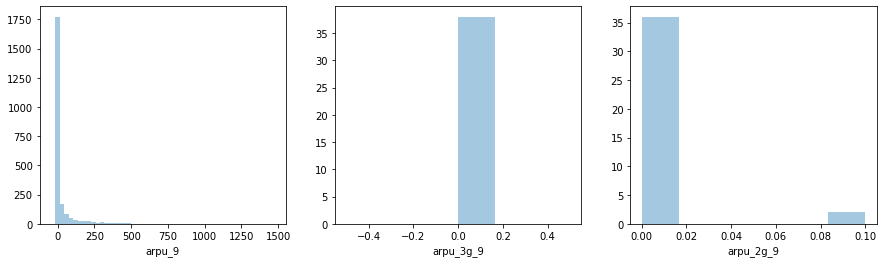

In [341]:
HV_telecom_9 = HV_telecom[['churn','arpu_9','arpu_3g_9','arpu_2g_9']]
HV_telecom_9 = HV_telecom_9.loc[(HV_telecom_9['churn'] == 1)]

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.distplot(HV_telecom_9['arpu_9'].dropna(),kde=False)
plt.subplot(1,3,2)
sns.distplot(HV_telecom_9['arpu_3g_9'].dropna(),kde=False)
plt.subplot(1,3,3)
sns.distplot(HV_telecom_9['arpu_2g_9'].dropna(),kde=False)
plt.show()

## 3.8 Remove attributes of the churn phase
- Remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [342]:
columns_9 = [col for col in HV_telecom.columns if ('_9' in col)]
columns_9.append('sep_vbc_3g')  ## Adding it seprately as it doesn't have _9
HV_telecom.drop(columns=columns_9,inplace=True)
HV_telecom.shape

(27063, 159)

# **<font color='blue'> 4. Feature Engineering</font>**

## 4.1 Delta/diff feature and trend feature for all continous features

Following set of new features are derived for all continous variables
  -  A `delta/diff` feature is calculated by subtracting the average of a feature in good phase from the corresponding feature in action pahse, it will help to understand if there is any significant decline in mou, recharge or pack usage etc.
  - A `trend` features is calculated for capturing the usage trend from corresponding delta/diff feature

In [343]:
columns_cat_trend = []
HV_telecom_diff = pd.DataFrame()
for col in range (0,len(columns_6)):
    new_col = columns_6[col][:-2]+'_diff'
    HV_telecom_diff[new_col] = HV_telecom[columns_8[col]] - (HV_telecom[columns_6[col]] + HV_telecom[columns_7[col]])/2
    new_col_trend = columns_6[col][:-2]+'_trend'
    HV_telecom_diff[new_col_trend] = HV_telecom_diff[new_col].apply(lambda x: 1 if x>=0 else 0)
    columns_cat_trend.append(new_col_trend)

## 4.2 Night pack, FB user, monthly_2g and monthly_3g
- Derive categories by subtractking the average of good phase from the corresponding feature in action phase and check if value is <0, 0 or >0 and assign category accordingly.

In [344]:
# checking the user behaviour between good and action phase, when usage reduces in the action phase , customers are likely to churn
HV_telecom['night_pck_user'] = HV_telecom.night_pck_user_8 - (HV_telecom.night_pck_user_6 + HV_telecom.night_pck_user_7)/2
# mapping the usage trend 0:k No change 1: increase in usage and -1: decrease in usage
HV_telecom['night_pck_user'] = HV_telecom.night_pck_user.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))

# checking the user behaviour between good and action phase, when usage reduces in the action phase , customers are likely to churn
HV_telecom['fb_user'] = HV_telecom.fb_user_8 - (HV_telecom.fb_user_6 + HV_telecom.fb_user_7)/2
# mapping the usage trend 0: No change 1: increase in usage -1: decrease in usage
HV_telecom['fb_user'] = HV_telecom.fb_user.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))

HV_telecom['monthly_2g'] = HV_telecom.monthly_2g_8 - (HV_telecom.monthly_2g_6 + HV_telecom.monthly_2g_7)/2
HV_telecom['monthly_2g'] = HV_telecom.monthly_2g.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))

HV_telecom['monthly_3g'] = HV_telecom.monthly_3g_8 - (HV_telecom.monthly_3g_6 + HV_telecom.monthly_3g_7)/2
HV_telecom['monthly_3g'] = HV_telecom.monthly_3g.apply(lambda x: -1 if x<0 else (1 if x>0 else 0))


HV_telecom.drop(columns=columns_cat,inplace=True)


## 4.3 Recency
- Create new columns to check `recency` of recharge for calls and data as below

In [345]:
cols_date = [cols for cols in HV_telecom.columns if 'date' in cols]
HV_telecom[cols_date] = HV_telecom[cols_date].apply(pd.to_datetime)

In [346]:
from datetime import datetime

# End of action phase(31-Aug-2014) is considered as basis for calculation of receny 
HV_telecom['date_of_last_rech_gp'] = HV_telecom[['date_of_last_rech_6', 'date_of_last_rech_7']].max(axis=1)
HV_telecom['recency_gp'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_gp']).dt.days)
# if no recharge is date is found then begin of good phase is considerd (least recency)
HV_telecom['recency_gp'].fillna((datetime(2014, 8, 31) - datetime(2014, 6, 1)).days, inplace=True)
HV_telecom['recency_ap'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_8']).dt.days)
# if the customer has not done recharge in action phase then last date from good phase is considered for recency
HV_telecom['recency_ap'].fillna(HV_telecom['recency_gp'], inplace=True)

HV_telecom['date_of_last_rech_data_gp'] = HV_telecom[['date_of_last_rech_data_6', 'date_of_last_rech_data_7']].max(axis=1)
# if no recharge is date is found then begin of good phase is considerd (least recency)
HV_telecom['recency_data_gp'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_data_gp']).dt.days)
HV_telecom['recency_data_gp'].fillna((datetime(2014, 8, 31) - datetime(2014, 6, 1)).days, inplace=True)
# if the customer has not done recharge in action phase then last date from good phase is considered for recency
HV_telecom['recency_data_ap'] = ((datetime(2014, 8, 31) - HV_telecom['date_of_last_rech_data_8']).dt.days)

HV_telecom['recency_data_ap'].fillna(HV_telecom['recency_data_gp'], inplace=True)

HV_telecom.drop(['date_of_last_rech_gp', 'date_of_last_rech_data_gp','date_of_last_rech_data_6', 'date_of_last_rech_data_7',
                'date_of_last_rech_data_8', 'date_of_last_rech_6', 'date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [347]:
HV_telecom.shape
#HV_telecom.info(max_cols=150)

(27063, 149)

# **<font color='blue'>5. Perform EDA </font>**

## 5.1 Univariate Analysis

### Churn Rate

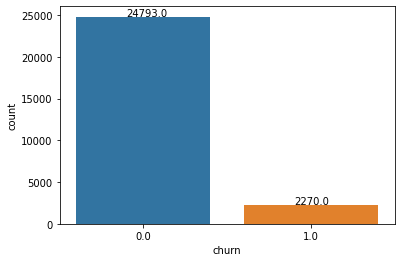

In [348]:
ax = sns.countplot(x=HV_telecom['churn'])

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))
plt.show()

**<font color='green'>Analysis:</font>**
Churn rate has class imabalance so we need to handel this

### Average Revenue Per User (arpu)

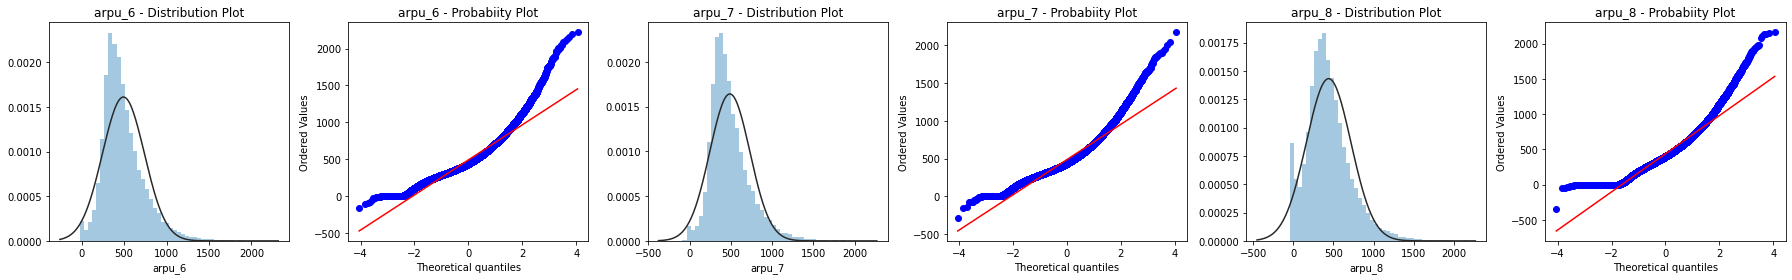

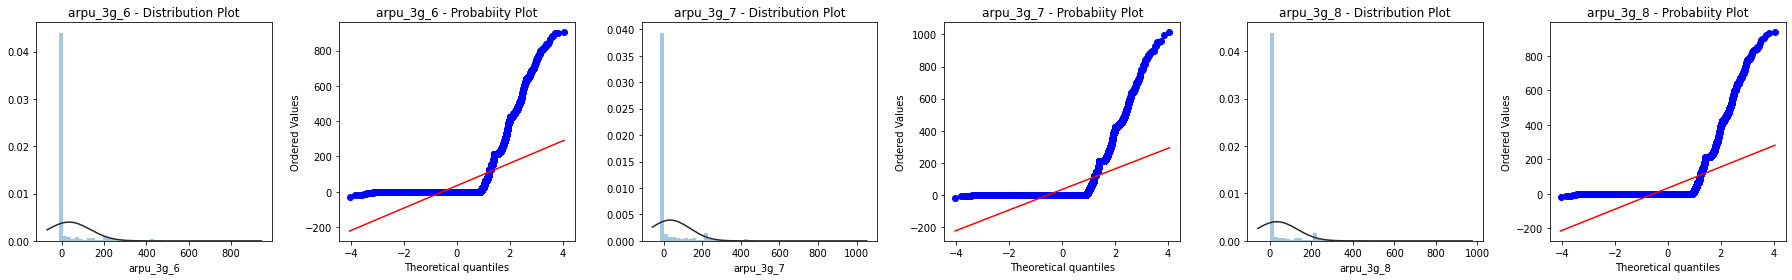

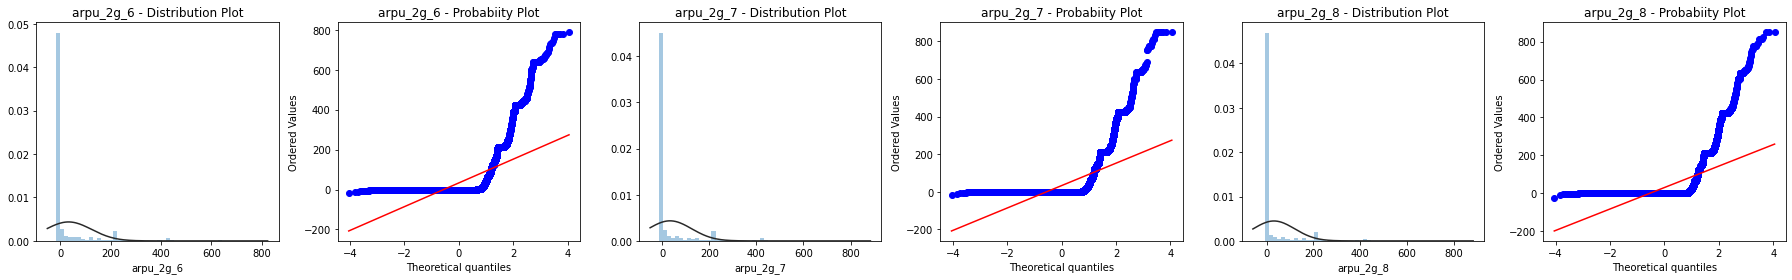

In [349]:
cols_arpu = [col for col in HV_telecom.columns if ('arpu' in col and '6' in col)]
for f in cols_arpu:
    dist_prob_plot(f)

**<font color='green'>Ananlysis:</font>**
- Based on distribution and probability plot for different **`arpu`**, we can see that there are many outliers with high value. We can consider them upper band of high value customers whom we have to retain.

### Recharge Amounts

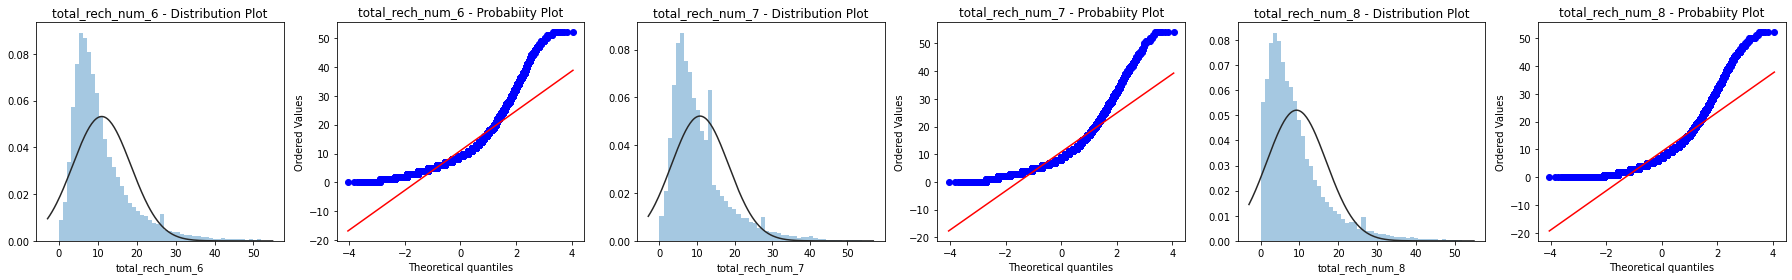

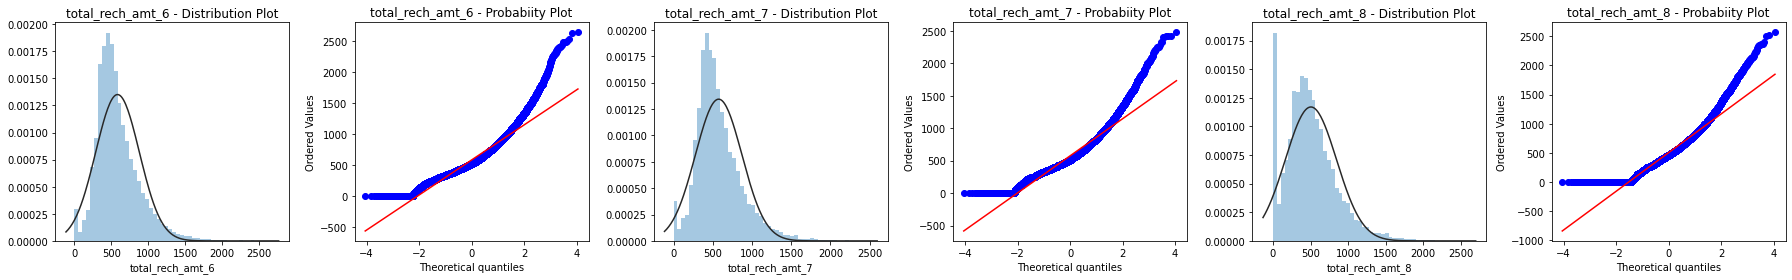

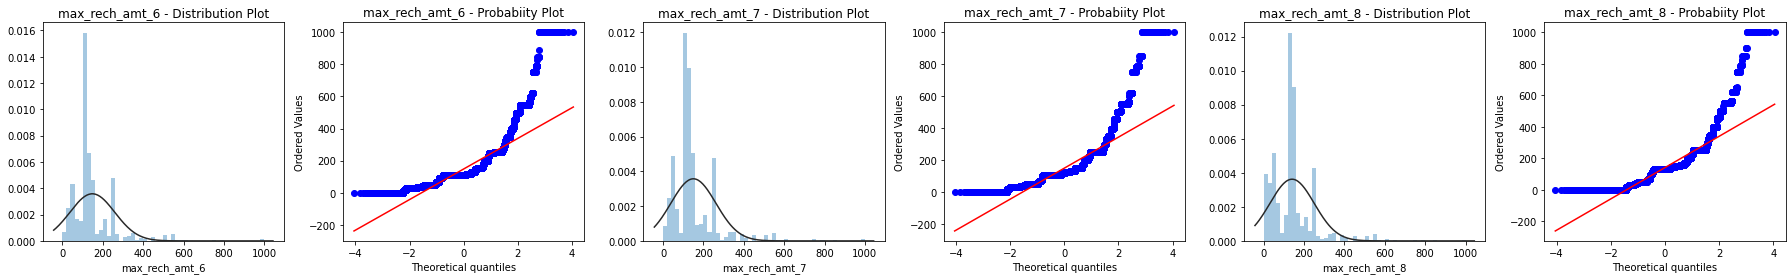

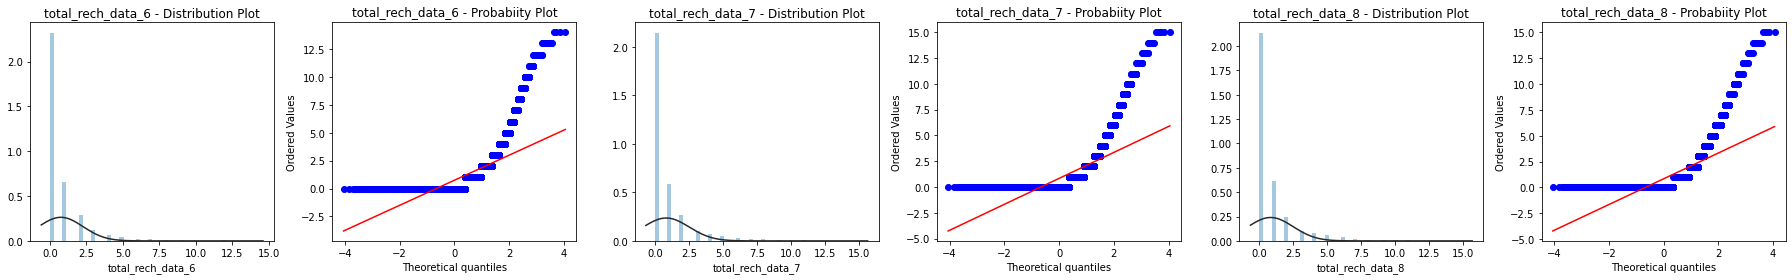

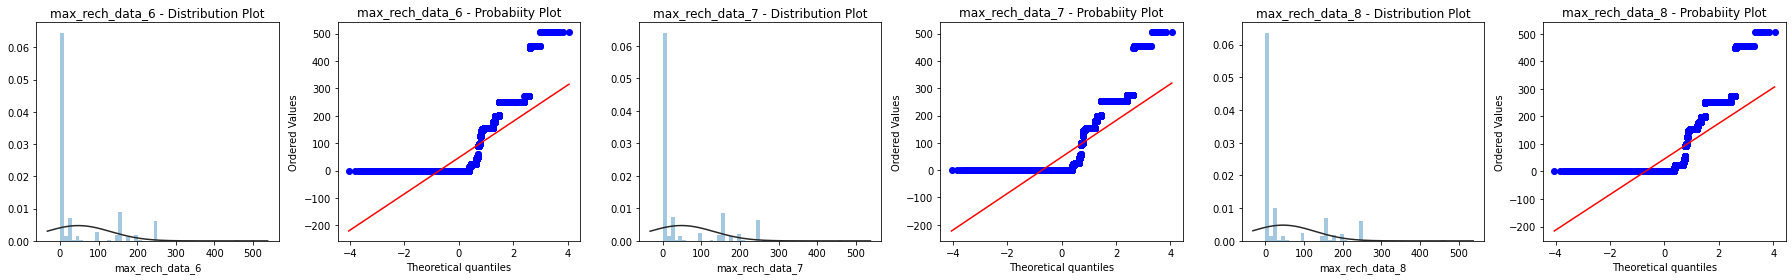

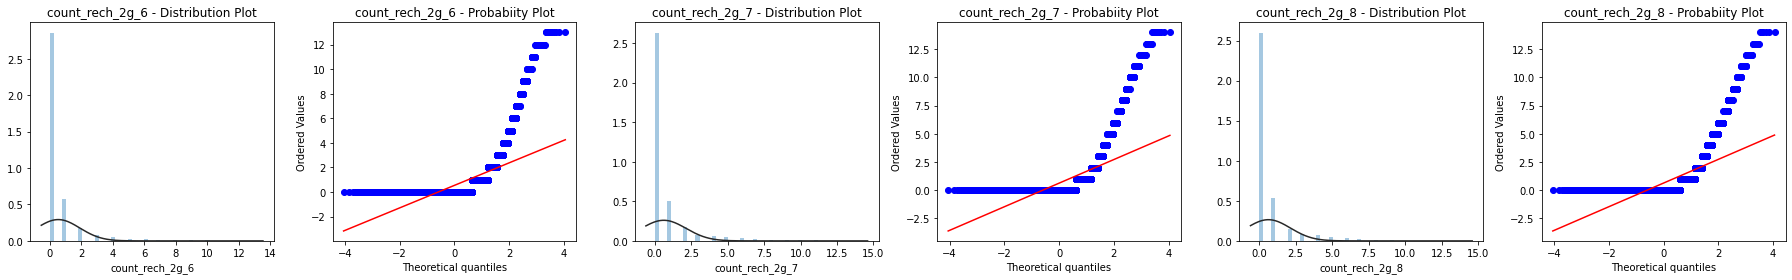

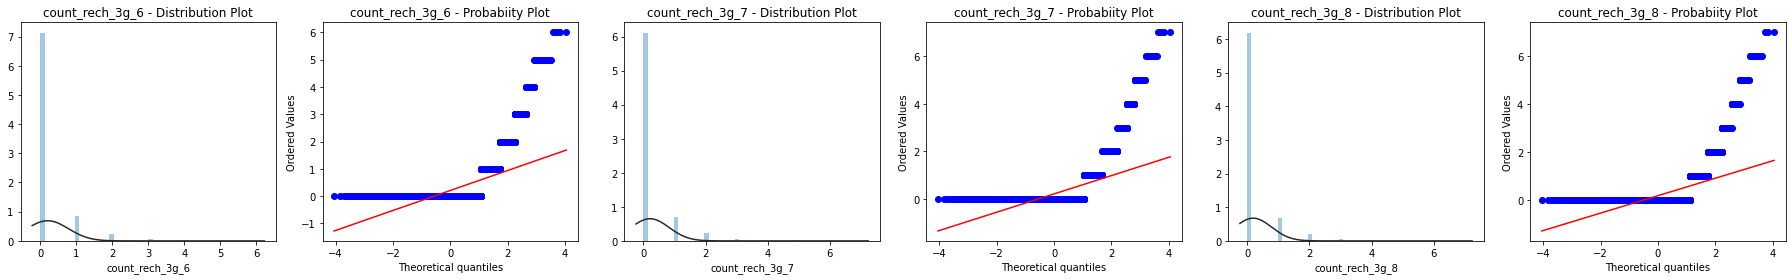

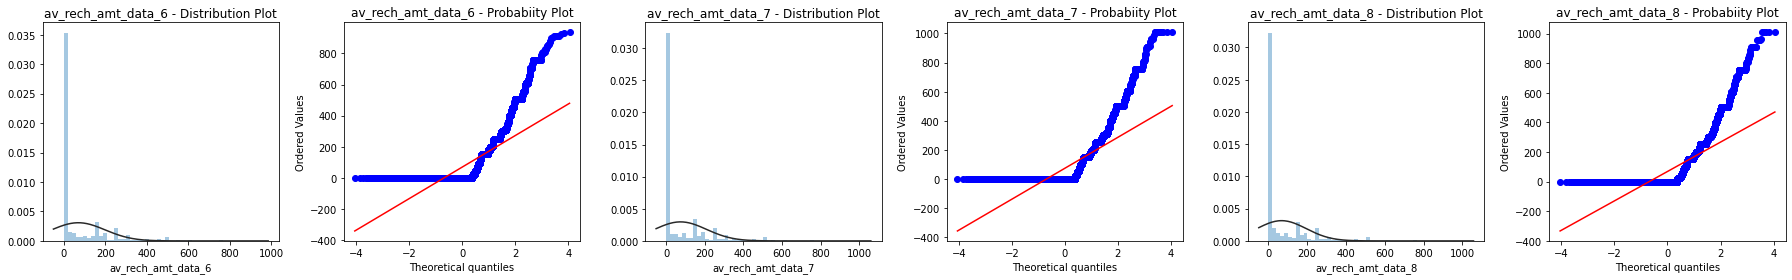

In [350]:
cols_rech = [col for col in HV_telecom.columns if ('rech' in col and '6' in col and 'date' not in col)]
#cols_rech
for f in cols_rech:
    dist_prob_plot(f)

#### MISC features - night, sachet, vbc

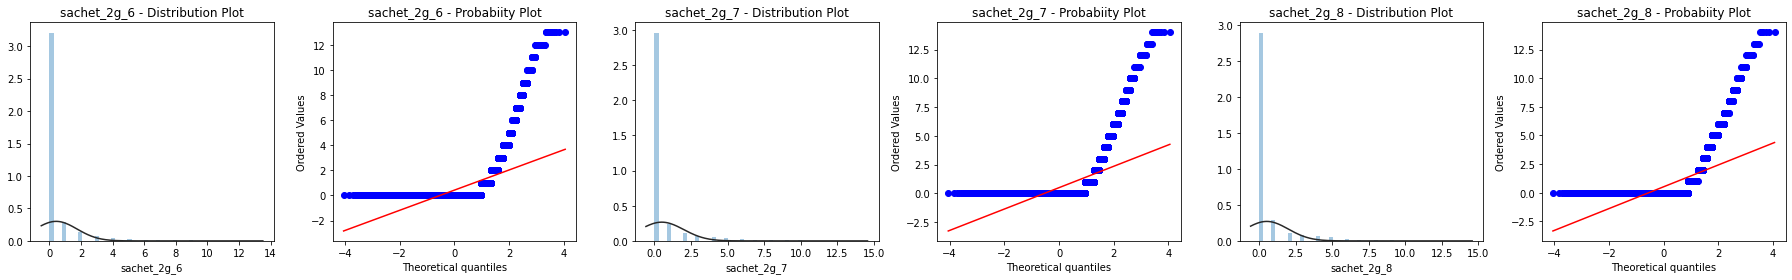

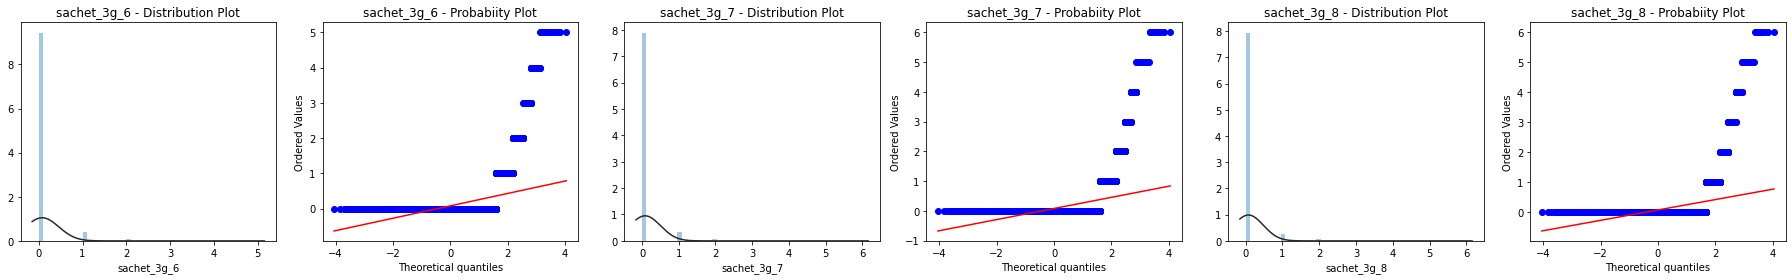

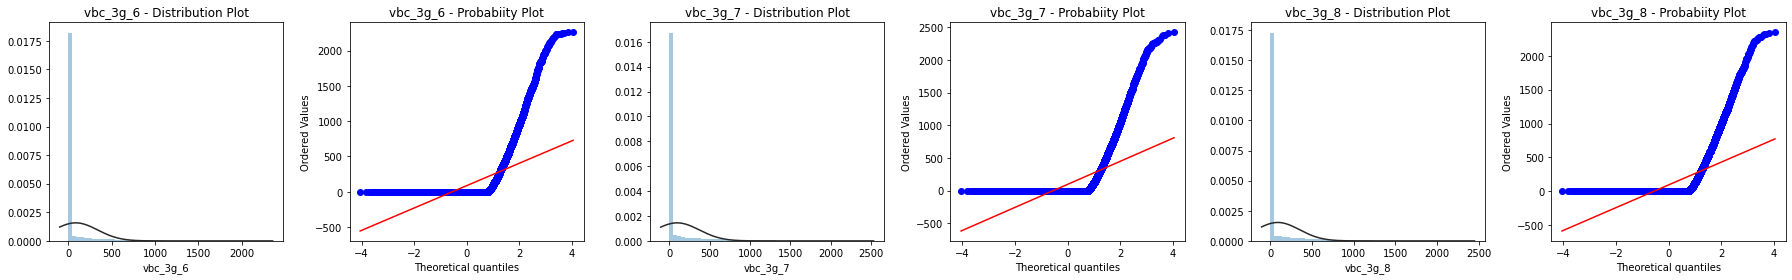

In [351]:
cols_misc = [col for col in HV_telecom.columns if (('night' in col or 'sachet' in col or 'vbc' in col) and '6' in col)]
#cols_misc
for f in cols_misc:
    dist_prob_plot(f)

**<font color='green'>Ananlysis:</font>**
- Based on distribution and probability plot for different misc features, we can see that there are many outliers with high value. There is a special set of customers using these features

## 5.2 Bivariate Analysis

### Define functions for Graphs and Plots

In [352]:
def plot_byChurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(HV_telecom.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

In [353]:
def plot_byChurnMou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=HV_telecom.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='orange')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

### Age on Network (aon)

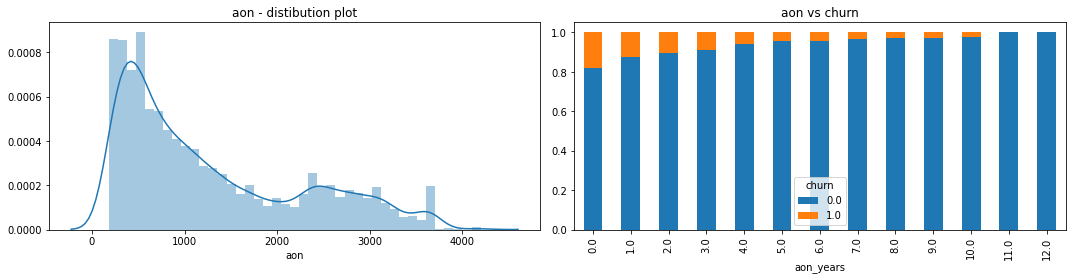

In [354]:
## As 'aon' is number of days, converting it into years for better analysis. Rounding of to nearest year number
HV_telecom['aon_years'] = round(HV_telecom['aon']/(30*12))

##Plot the data
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,2,1)
sns.distplot(HV_telecom['aon'],label='aon - distribution plot',ax=ax1)
plt.title('aon - distibution plot')
ax2 = plt.subplot(1,2,2)
pd.crosstab(HV_telecom.aon_years,HV_telecom.churn, normalize='index').plot(kind='bar',title='aon vs churn',ax=ax2,stacked=True)
plt.tight_layout()
plt.show()

HV_telecom.drop(columns='aon_years',inplace=True)

### Recency

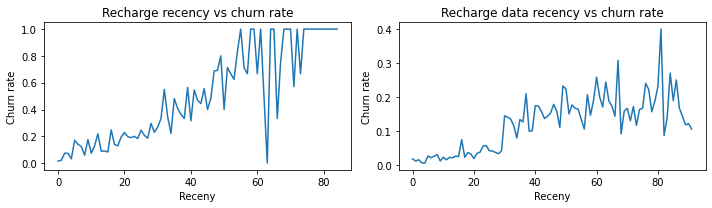

In [355]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
curn_rate = pd.crosstab(HV_telecom.recency_ap,HV_telecom.churn, normalize='index')
plt.xlabel('Receny')
plt.ylabel('Churn rate')
plt.title('Recharge recency vs churn rate')
plt.plot(curn_rate[1.0])

plt.subplot(1,2,2)
curn_rate = pd.crosstab(HV_telecom.recency_data_ap,HV_telecom.churn, normalize='index')
plt.xlabel('Receny')
plt.ylabel('Churn rate')
plt.title('Recharge data recency vs churn rate')
plt.plot(curn_rate[1.0])

plt.tight_layout()
plt.show()

**<font color='green'>Analysis:</font>** **churn rate** is high if recharge is done long time ago in `Good phase`

### Night pack, Fb usage, monthly 2g and 3g trend on Churn

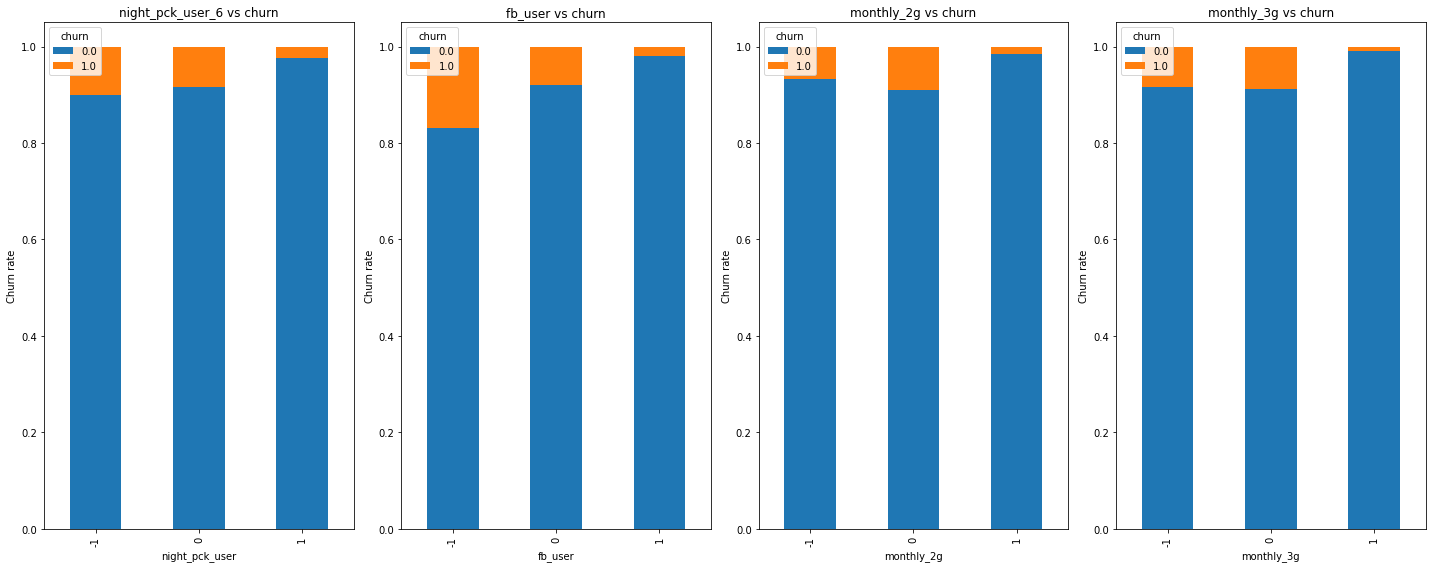

In [356]:
#HV_telecom['night_pck_user'] = HV_telecom.night_pck_user.apply(lambda x: 0 if x<=0 else 1)

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,4,1)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.night_pck_user,HV_telecom.churn,normalize='index').plot(kind='bar',title='night_pck_user_6 vs churn', stacked=True, ax=ax1)

ax1 = plt.subplot(1,4,2)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.fb_user,HV_telecom.churn,normalize='index').plot(kind='bar',title='fb_user vs churn',stacked=True, ax=ax1)

ax1 = plt.subplot(1,4,3)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.monthly_2g,HV_telecom.churn,normalize='index').plot(kind='bar',title='monthly_2g vs churn',stacked=True, ax=ax1)

ax1 = plt.subplot(1,4,4)
plt.xlabel('Usage trend')
plt.ylabel('Churn rate')
pd.crosstab(HV_telecom.monthly_3g,HV_telecom.churn,normalize='index').plot(kind='bar',title='monthly_3g vs churn',stacked=True, ax=ax1)

plt.tight_layout()
plt.show()

**<font color='green'>Analysis:</font>** **churn rate** is high if the usage trend for fb_user/night_pack is negative.

### Comparison of Good phase vs Action phase

In [357]:
col_avg = []
for c in range (0,len(columns_6)):
    col_avg.append(columns_6[c][:-2]+'_avg')
    HV_telecom[col_avg[c]] = (HV_telecom[columns_6[c]] + HV_telecom[columns_7[c]])/2

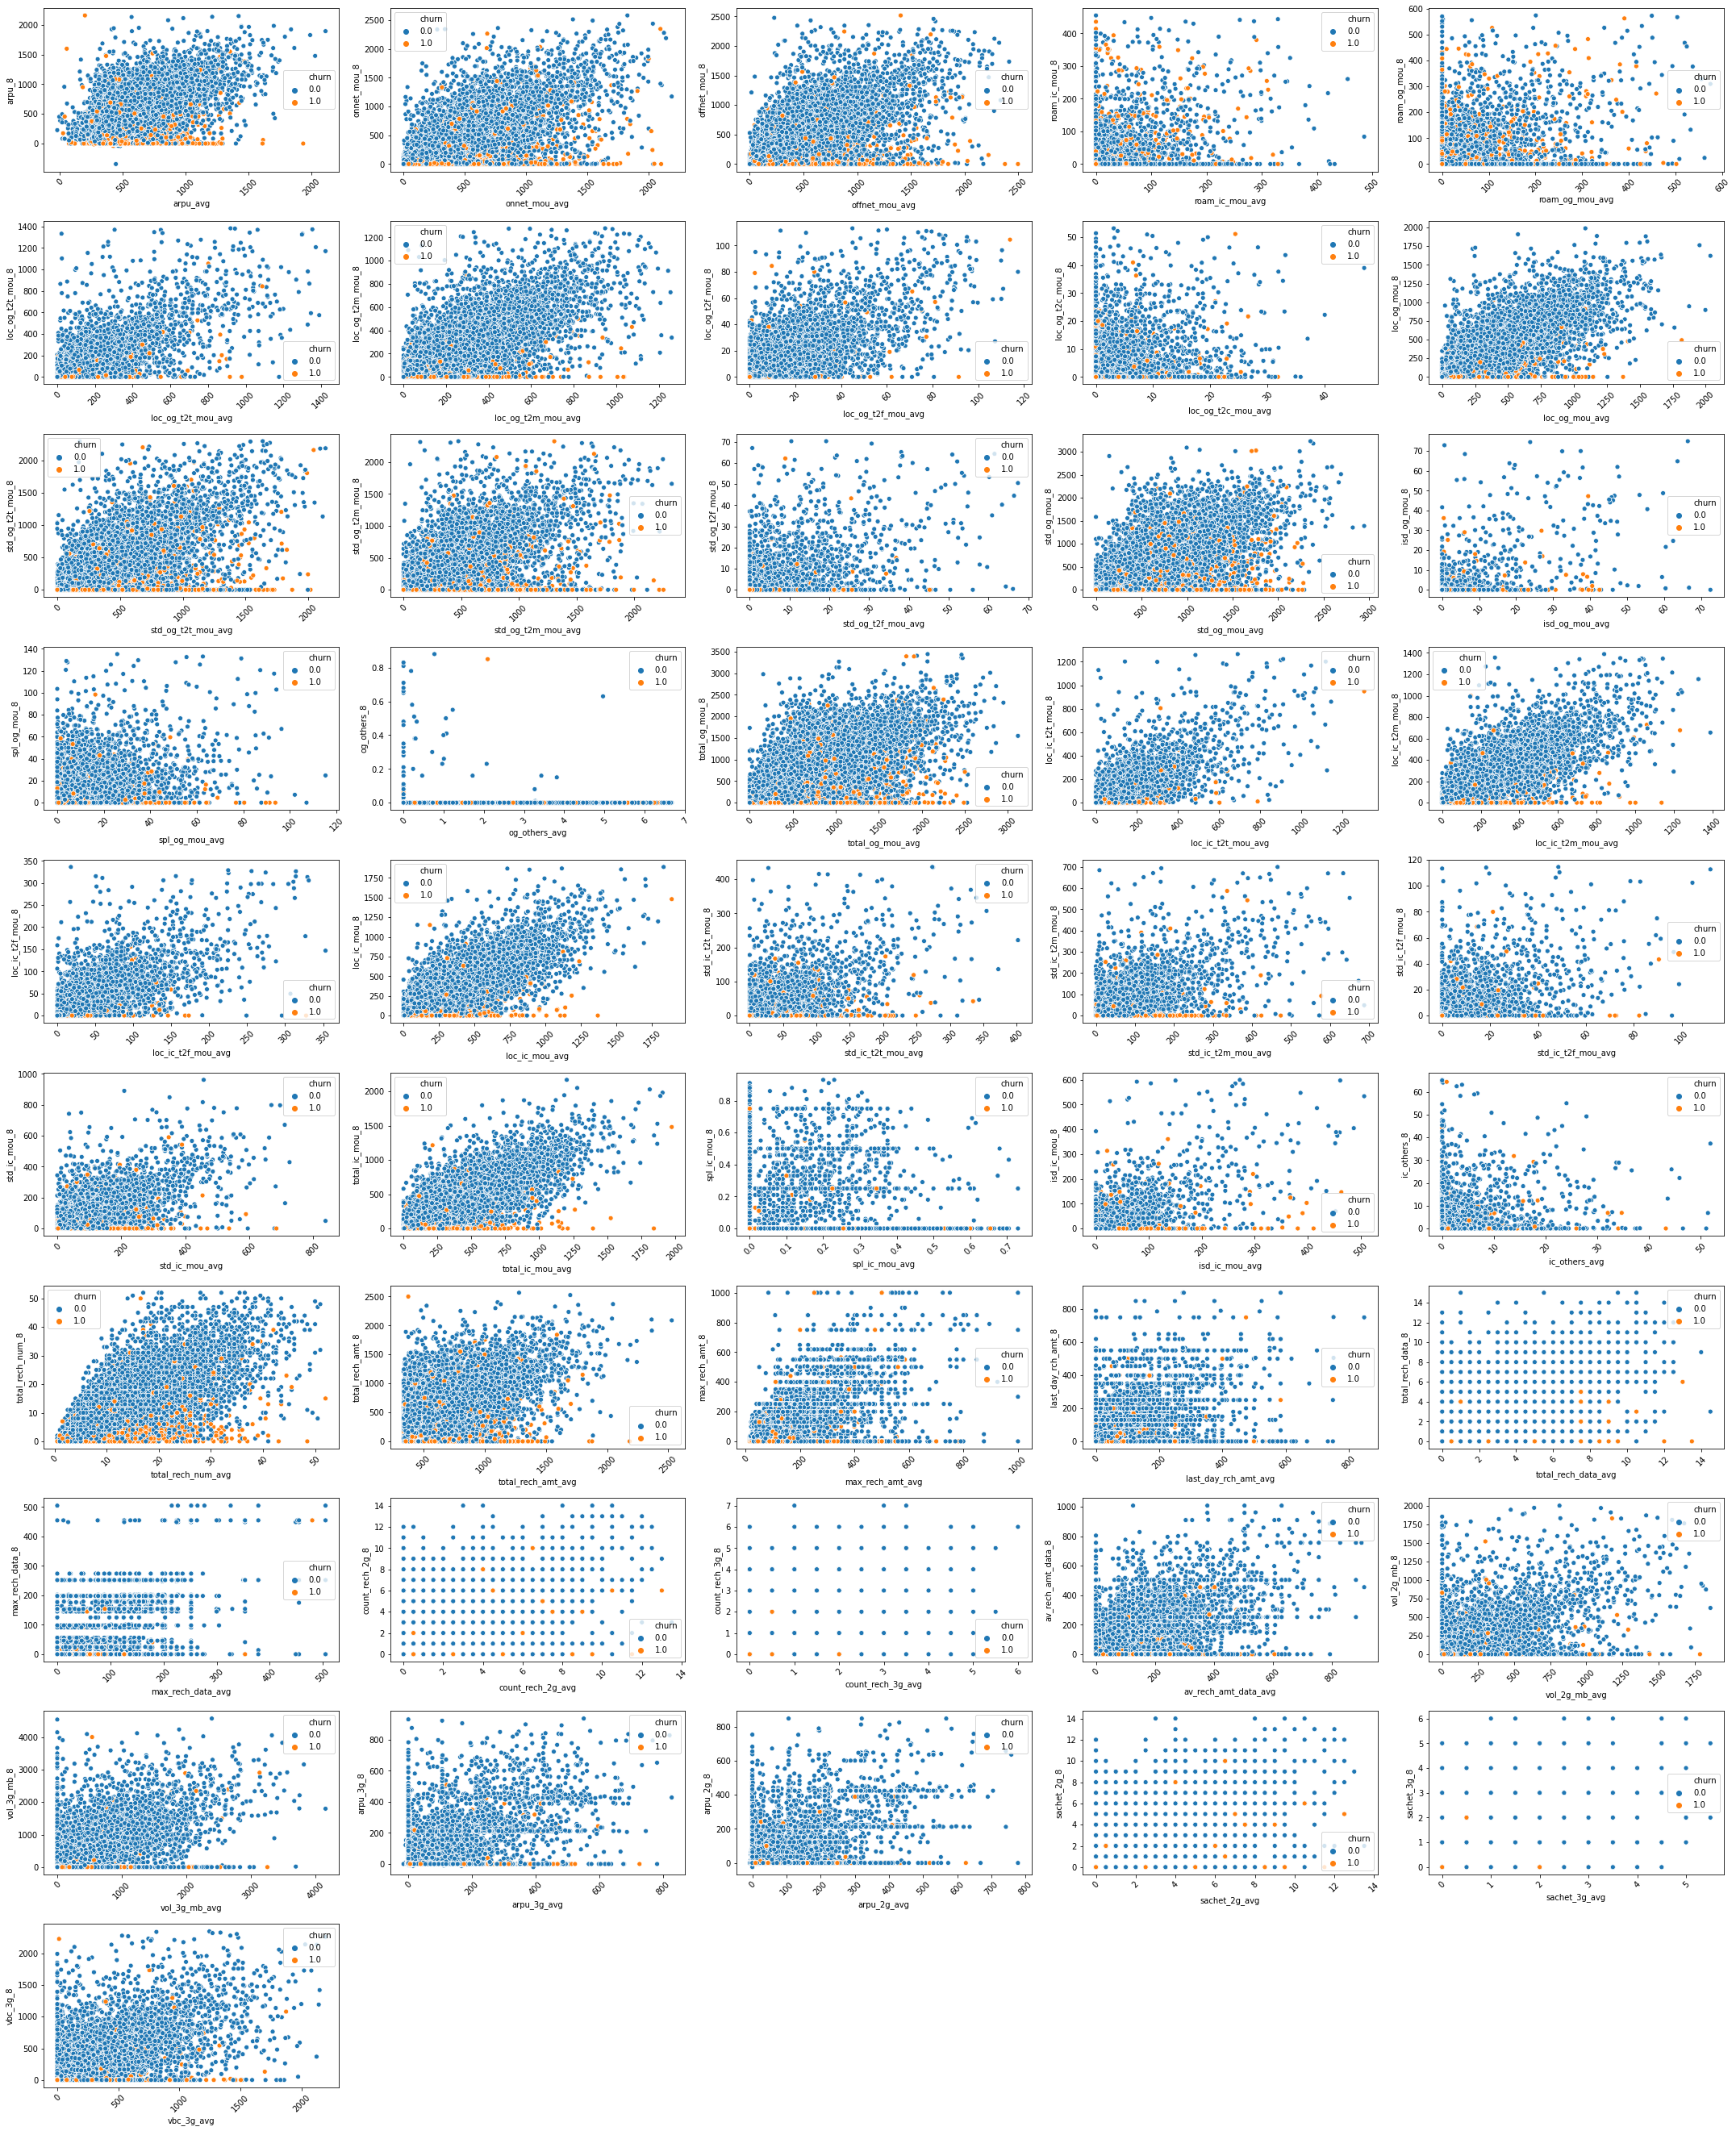

In [358]:
plt.figure(figsize=(30.0,(len(columns_8)/5)*4))
for n in range(1,len(columns_8)+1):
    mscatterplot(df=HV_telecom,x_colname=col_avg[n-1],y_colname=columns_8[n-1] ,hue_colname='churn',pltnum=n,listlen=len(columns_8)+1)

plt.tight_layout()
plt.show()

##Drop all the _avg columns created
HV_telecom.drop(columns=col_avg,inplace=True)

**<font color='green'>Analysis:</font>**
There are many features as below shows that `decline in mou or rech amount/number` in **Action phase** as compared to **Good phase**. It means that we can  expect some of these features as important features to decide if customer is going to `churn` or not.<br>
Features like :- <br>
**onnet_mou_, offnet_mou_, roam_og_mou_, loc_og_mou_, std_og_t2t_mou_, std_og_t2m_mou_, std_og_mou_avg_, total_og_mou, loc_ic_t2t_mou_, loc_ic_t2m_mou_, loc_ic_mou_, total_ic_mou_,total_rech_num_, sachet_2g_**

### Month vs Incoming & Outgoing calls

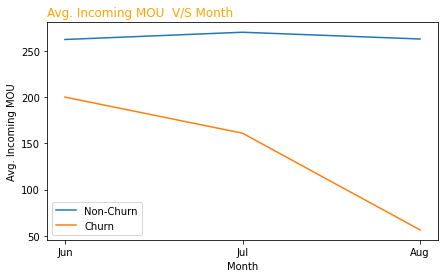

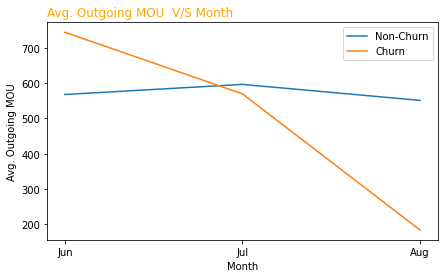

In [359]:
# Plotting month vs incoming and outcomings call
ic_col = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_col = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_byChurnMou(ic_col,'Incoming')
plot_byChurnMou(og_col,'Outgoing')

**<font color='green'>Analysis:</font>**
- We can see that in the month of June the minutes of incoming and outcoming calls are high and further decreases
- There is a huge fall after July 
- The fall is more for outcoming calls compared to the incoming calls
- Incoming calls minute is all time greater for non-churn as compared to the customer considered as churn
- But for outgoing the calls minute is higher at start and then falls significantly

### Month vs Standard and Local outgoing calls

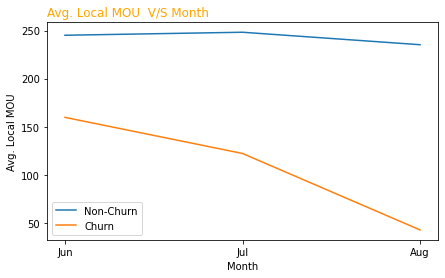

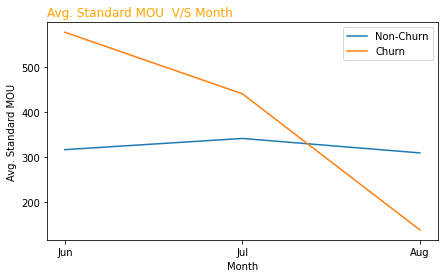

In [360]:
loc_og_col = ['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8']
std_og_col = ['std_og_mou_6','std_og_mou_7','std_og_mou_8']
plot_byChurnMou(loc_og_col,'Local')
plot_byChurnMou(std_og_col,'Standard')

**<font color='green'>Analysis:</font>**
- We can clearly see that customers who churn are mostly use standard call
- And there is a drastic fall in mou for customer who churn
- Maybe company is not providing best plans for standard calls and customer are finding better plans with competitors

### Month vs outgoing roaming calls

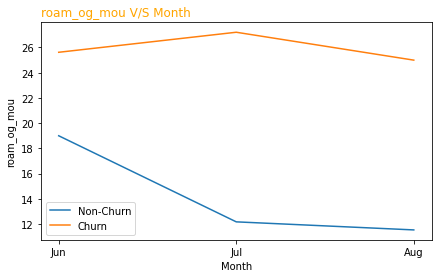

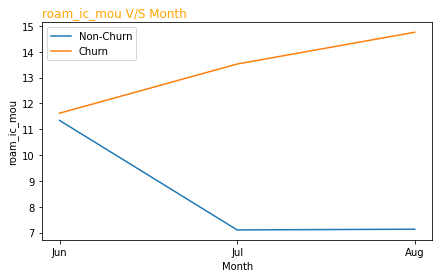

In [361]:
#Plotting outgoing vs incoming
plot_byChurn(HV_telecom,'roam_og_mou')
plot_byChurn(HV_telecom,'roam_ic_mou')

**<font color='green'>Analysis:</font>**
- We can see that roaming is one of the major factor for customers churn 
- High incoming and outcoming mou are leading to high customer churn rate
- This is maybe company has imposed high tariff on roaming calls and customers are unhappy with the rates leading to churning

### Correlation Matrix of the features

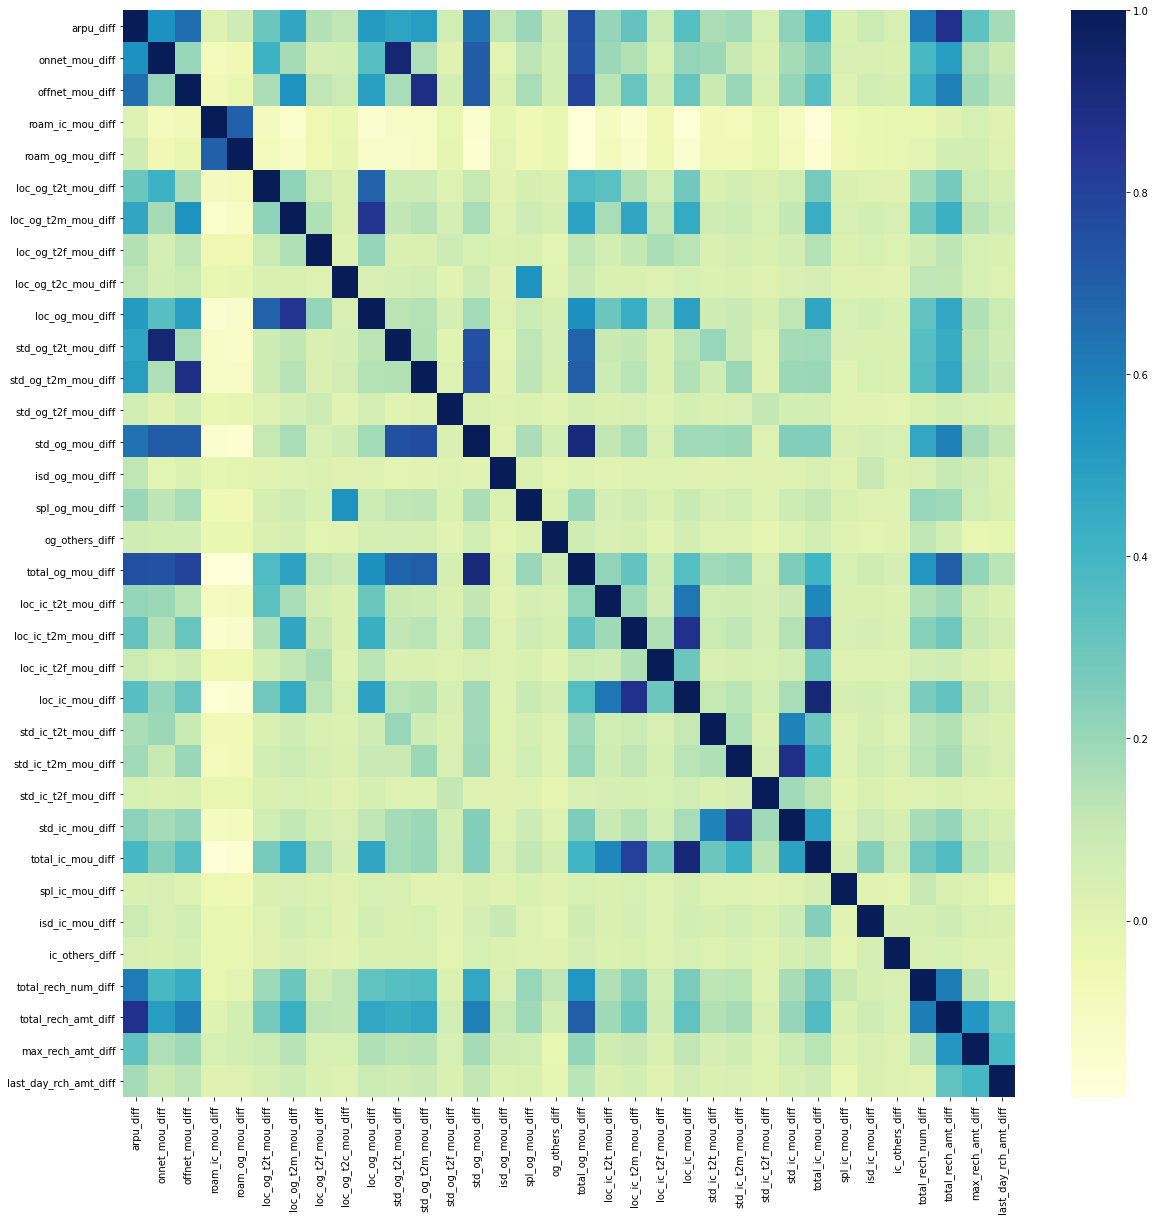

In [362]:
plt.figure(figsize=(20, 20))

columns_corr = [col for col in HV_telecom_diff.columns if (('_diff' in col) and ('_2g' not in col) and ('_3g' not in col) and ('_data' not in col))]
sns.heatmap(HV_telecom_diff[columns_corr].corr(),  cmap="YlGnBu")
plt.show()

In [363]:
HV_telecom_diff[['recency_ap','recency_data_ap', 'aon', 'churn']] = HV_telecom[['recency_ap','recency_data_ap', 'aon', 'churn']]
HV_telecom_diff.shape
display(HV_telecom_diff.describe())

arpu_diff    arpu_trend  onnet_mou_diff  onnet_mou_trend  \
count  27063.000000  27063.000000    27063.000000     27063.000000   
mean     -50.206565      0.405572      -29.493575         0.413073   
std      238.433250      0.491012      228.199878         0.492395   
min    -1932.651000      0.000000    -2102.210000         0.000000   
25%     -170.947500      0.000000      -66.705000         0.000000   
50%      -41.937500      0.000000       -8.625000         0.000000   
75%       77.019750      1.000000       26.060000         1.000000   
max     1961.859000      1.000000     2066.855000         1.000000   

       offnet_mou_diff  offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  \
count     27063.000000      27063.000000      27063.000000       27063.000000   
mean        -42.312980          0.408491         -1.733014           0.757418   
std         256.626414          0.491564         35.124849           0.428652   
min       -2496.280000          0.000000       -431.910000           0.000000   
25%        -114.790000          0.000000          0.000000           1.000000   
50%         -21.515000          0.000000          0.000000           1.000000   
75%          49.407500          1.000000          0.000000           1.000000   
max        2247.895000          1.000000        454.690000           1.000000   

       roam_og_mou_diff  roam_og_mou_trend  loc_og_t2t_mou_diff  \
count      27063.000000       27063.000000         27063.000000   
mean          -3.833941           0.748808            -6.563341   
std           53.065848           0.433707            80.123262   
min         -538.135000           0.000000         -1176.940000   
25%           -0.085000           0.000000           -19.132500   
50%            0.000000           1.000000            -2.360000   
75%            0.000000           1.000000             9.630000   
max          570.780000           1.000000          1310.490000   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  \
count          27063.000000         27063.000000          27063.000000   
mean               0.422791           -11.740631              0.424787   
std                0.494012           112.589856              0.494320   
min                0.000000         -1037.475000              0.000000   
25%                0.000000           -44.227500              0.000000   
50%                0.000000            -5.775000              0.000000   
75%                1.000000            23.450000              1.000000   
max                1.000000          1069.225000              1.000000   

       loc_og_t2f_mou_diff  loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  \
count         27063.000000          27063.000000         27063.000000   
mean             -0.384630              0.577209             0.050391   
std               7.922228              0.494012             4.475833   
min             -91.430000              0.000000           -35.805000   
25%              -1.287500              0.000000            -0.230000   
50%               0.000000              1.000000             0.000000   
75%               0.300000              1.000000             0.000000   
max              97.900000              1.000000            51.460000   

       loc_og_t2c_mou_trend  loc_og_mou_diff  loc_og_mou_trend  \
count          27063.000000     27063.000000      27063.000000   
mean               0.707276       -18.689077          0.421055   
std                0.455021       153.434362          0.493737   
min                0.000000     -1373.410000          0.000000   
25%                0.000000       -65.637500          0.000000   
50%                1.000000        -9.070000          0.000000   
75%                1.000000        32.492500          1.000000   
max                1.000000      1484.140000          1.000000   

       std_og_t2t_mou_diff  std_og_t2t_mou_trend  std_og_t2m_mou_diff  \
count         27063.000000          27063.000000    

### Dummy Variable generation for categorical features

In [364]:
dummy_df = pd.get_dummies(data=HV_telecom[columns_cat_new],columns=columns_cat_new,drop_first=True)
HV_telecom_diff = pd.concat([HV_telecom_diff,dummy_df],axis=1)
HV_telecom_diff.shape
display(HV_telecom_diff.describe())

arpu_diff    arpu_trend  onnet_mou_diff  onnet_mou_trend  \
count  27063.000000  27063.000000    27063.000000     27063.000000   
mean     -50.206565      0.405572      -29.493575         0.413073   
std      238.433250      0.491012      228.199878         0.492395   
min    -1932.651000      0.000000    -2102.210000         0.000000   
25%     -170.947500      0.000000      -66.705000         0.000000   
50%      -41.937500      0.000000       -8.625000         0.000000   
75%       77.019750      1.000000       26.060000         1.000000   
max     1961.859000      1.000000     2066.855000         1.000000   

       offnet_mou_diff  offnet_mou_trend  roam_ic_mou_diff  roam_ic_mou_trend  \
count     27063.000000      27063.000000      27063.000000       27063.000000   
mean        -42.312980          0.408491         -1.733014           0.757418   
std         256.626414          0.491564         35.124849           0.428652   
min       -2496.280000          0.000000       -431.910000           0.000000   
25%        -114.790000          0.000000          0.000000           1.000000   
50%         -21.515000          0.000000          0.000000           1.000000   
75%          49.407500          1.000000          0.000000           1.000000   
max        2247.895000          1.000000        454.690000           1.000000   

       roam_og_mou_diff  roam_og_mou_trend  loc_og_t2t_mou_diff  \
count      27063.000000       27063.000000         27063.000000   
mean          -3.833941           0.748808            -6.563341   
std           53.065848           0.433707            80.123262   
min         -538.135000           0.000000         -1176.940000   
25%           -0.085000           0.000000           -19.132500   
50%            0.000000           1.000000            -2.360000   
75%            0.000000           1.000000             9.630000   
max          570.780000           1.000000          1310.490000   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_diff  loc_og_t2m_mou_trend  \
count          27063.000000         27063.000000          27063.000000   
mean               0.422791           -11.740631              0.424787   
std                0.494012           112.589856              0.494320   
min                0.000000         -1037.475000              0.000000   
25%                0.000000           -44.227500              0.000000   
50%                0.000000            -5.775000              0.000000   
75%                1.000000            23.450000              1.000000   
max                1.000000          1069.225000              1.000000   

       loc_og_t2f_mou_diff  loc_og_t2f_mou_trend  loc_og_t2c_mou_diff  \
count         27063.000000          27063.000000         27063.000000   
mean             -0.384630              0.577209             0.050391   
std               7.922228              0.494012             4.475833   
min             -91.430000              0.000000           -35.805000   
25%              -1.287500              0.000000            -0.230000   
50%               0.000000              1.000000             0.000000   
75%               0.300000              1.000000             0.000000   
max              97.900000              1.000000            51.460000   

       loc_og_t2c_mou_trend  loc_og_mou_diff  loc_og_mou_trend  \
count          27063.000000     27063.000000      27063.000000   
mean               0.707276       -18.689077          0.421055   
std                0.455021       153.434362          0.493737   
min                0.000000     -1373.410000          0.000000   
25%                0.000000       -65.637500          0.000000   
50%                1.000000        -9.070000          0.000000   
75%                1.000000        32.492500          1.000000   
max                1.000000      1484.140000          1.000000   

       std_og_t2t_mou_diff  std_og_t2t_mou_trend  std_og_t2m_mou_diff  \
count         27063.000000          27063.000000    

# **<font color=blue> 6. Model building preparation </font>**

## 6.1 Divide data in Train and Test sets

In [365]:
X = HV_telecom_diff.drop(columns='churn')
y = HV_telecom_diff['churn']
X_columns = X.columns
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)
display(X.shape)
display(y.shape)

(27063, 103)

(27063,)

In [366]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.values
y_test = y_test.values
display(y_train.shape)

(18944,)

### 6.2 Scale the train and test data

In [367]:
X_cat_cols = list(dummy_df.columns.values) + columns_cat_trend
X_num_cols = X_train.drop(X_cat_cols,axis=1).columns.tolist()

SS = StandardScaler() # Use standard scaler for scaling continous features
X_train = pd.concat([X_train[X_cat_cols],pd.DataFrame(SS.fit_transform(X_train.drop(X_cat_cols, axis=1)))], axis=1)
X_test = pd.concat([X_test[X_cat_cols],pd.DataFrame(SS.transform(X_test.drop(X_cat_cols, axis=1)))], axis=1)

X_train.columns = X_cat_cols+X_num_cols
X_test.columns = X_cat_cols+X_num_cols

In [368]:
#display(X_train_ss.shape)
display(X_train.shape)
display(round(X_train.describe(),2))

(18944, 103)

night_pck_user_0  night_pck_user_1  fb_user_0  fb_user_1  monthly_2g_0  \
count          18944.00          18944.00    18944.0   18944.00      18944.00   
mean               0.99              0.00        0.8       0.09          0.87   
std                0.11              0.07        0.4       0.29          0.34   
min                0.00              0.00        0.0       0.00          0.00   
25%                1.00              0.00        1.0       0.00          1.00   
50%                1.00              0.00        1.0       0.00          1.00   
75%                1.00              0.00        1.0       0.00          1.00   
max                1.00              1.00        1.0       1.00          1.00   

       monthly_2g_1  monthly_3g_0  monthly_3g_1  arpu_trend  onnet_mou_trend  \
count      18944.00      18944.00      18944.00    18944.00         18944.00   
mean           0.05          0.87          0.05        0.40             0.41   
std            0.22          0.34          0.22        0.49             0.49   
min            0.00          0.00          0.00        0.00             0.00   
25%            0.00          1.00          0.00        0.00             0.00   
50%            0.00          1.00          0.00        0.00             0.00   
75%            0.00          1.00          0.00        1.00             1.00   
max            1.00          1.00          1.00        1.00             1.00   

       offnet_mou_trend  roam_ic_mou_trend  roam_og_mou_trend  \
count          18944.00           18944.00           18944.00   
mean               0.41               0.76               0.75   
std                0.49               0.43               0.43   
min                0.00               0.00               0.00   
25%                0.00               1.00               0.00   
50%                0.00               1.00               1.00   
75%                1.00               1.00               1.00   
max                1.00               1.00               1.00   

       loc_og_t2t_mou_trend  loc_og_t2m_mou_trend  loc_og_t2f_mou_trend  \
count              18944.00              18944.00              18944.00   
mean                   0.42                  0.43                  0.58   
std                    0.49                  0.49                  0.49   
min                    0.00                  0.00                  0.00   
25%                    0.00                  0.00                  0.00   
50%                    0.00                  0.00                  1.00   
75%                    1.00                  1.00                  1.00   
max                    1.00                  1.00                  1.00   

       loc_og_t2c_mou_trend  loc_og_mou_trend  std_og_t2t_mou_trend  \
count              18944.00          18944.00              18944.00   
mean                   0.71              0.42                  0.54   
std                    0.46              0.49                  0.50   
min                    0.00              0.00                  0.00   
25%                    0.00              0.00                  0.00   
50%                    1.00              0.00                  1.00   
75%                    1.00              1.00                  1.00   
max                    1.00              1.00                  1.00   

       std_og_t2m_mou_trend  std_og_t2f_mou_trend  std_og_mou_trend  \
count              18944.00              18944.00          18944.00   
mean                   0.45                  0.83              0.43   
std                    0.50                  0.38              0.50   
min                    0.00                  0.00              0.00   
25%                    0.00                  1.00              0.00   
50%                    0.00                  1.00              0.00   
75%                    1.00                  1.00              1.00   
max                    1.00                  1.00              1.00   

       isd_og_

## 6.3 Apply PCA

- Transforming original dataset to reduced dimesion with PCA retaining 95% of variance

In [369]:
pca = PCA(n_components=0.95,random_state=42)
Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.transform(X_test)
print(' No of components after PCA :', pca.n_components_)

 No of components after PCA : 51


#### Making the scree plot

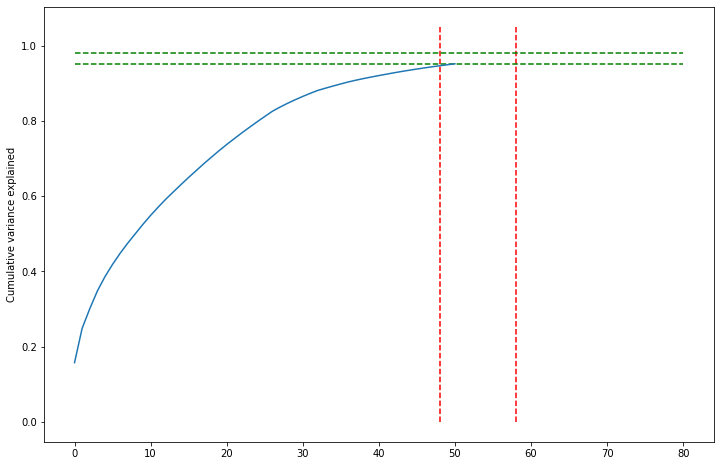

In [370]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_).round(4))
plt.vlines(x=48,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.vlines(x=58,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.hlines(y=0.95,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.hlines(y=0.98,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.ylabel("Cumulative variance explained")
plt.show()

### <font color='green'> **Model Evaluation Crtiteria** </font>

Following Criterion would be used during model evaluations:- 
- During cross-validation following evaluation metrics are generated `['recall','precision', 'accuracy', 'f1']`
- Best `recall/sensitivity` model is selected because accuracy of churn prediction has higher importance, but it is ensure that this selection does not lead to very high false-positive rate by observing f1_score
- For f1_score, a cutoff of about 0.3-0.5 appears to give the best predictive performance. It is intuitive that the cutoff is less than 0.5 because the training data contains many fewer examples of `churn`

Reference:
https://www.kdnuggets.com/2016/04/unbalanced-classes-svm-random-forests-python.html/2

## 6.4 Models with PCA

<font color='orange'> *** Please note that we have commented different parameters values used during parameter tuning as it takes long time to complete the execution ***</font>

### Resampling of dataset - for handling class imbalance

**Remarks**
- After resampling the dataset, it is found that the models are getting `overfitted` to resampled training data. Parameter tuning using GridSerchCV (Holdout test data is also part of resampled data) is also not reliable due to this issue. 
- Cross-validation results were good, but the same model was `not performing well on test data`. Due to this issue instead of resampling techniques, `class_weight` parameter is preferred for  handling Class imbalance

### <font color='green'> ***6.4.1 XGBoost*** </font>

**XGBoost** algorithm is a modification of the Gradient Boosting tree algorithm but it uses a more regularized model formulation to control overfitting, which gives it better performance, which is why it’s also known as ‘regularized boosting‘ technique.

- Objective Function : Training Loss + Regularization
Loss function controls the predictive power of the algorithm and regularization controls its simplicity

#### **Hyper parameter tuning:**
There are mainly 3 parameters to tune the model:
'learning_rate':[0.001,0.005,0.01,0.05],
'max_depth': [3,4,5],
'reg_alpha':[0.01,0.1,1,10,100],
'reg_lambda':[0.01,0.1,1,10],              

**1. leraning_rate & n_estimators***: Below learning rates were used with other parameters keeping at default values to check best combination of learning rate and n_estimators. 
- With lower learning rate, higher number of n_estimators are required to reach global minima.

learning_rate: 0.001,0.005,0.01,0.05,0.1,0.5,1

n_estimators: range(10,200,10)

**2. max_depth***: It is used to **control over-fitting*** as higher depth will allow model to learn relations very specific to a particular sample.
- max_depth tried were in range(3,12,1) 

***3. gamma***: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
- gamma values tried in range 0 to 0.4 were tried and best value was kept for modelling

**4. reg_alpha & reg_lambda:** 
- L1 regularization term on weight (analogous to Lasso regression). It can be used in case of very high dimensionality so that the algorithm runs faster when implemented
- L2 regularization term on weights (analogous to Ridge regression)
- Below combinations were tried to tune the model but it seems default values of 0 and 1 respectively works better.
'reg_alpha':[0.01,0.1,1,10,100],
'reg_lambda':[0.01,0.1,1,10],

**scale_pos_weight:**
- **Imbalance** in classes is handled by `scale_pos_weight` parameter
- Prediction accuracy of churn customer is more important than prediction accuracy of non-churn customers, so this pupose scale_pos_weight' : `[16]` is used instead of `balanced` option

In [372]:
# hyperparameter tuning with XGBoost

# specify range of hyperparameters
param_grid = { #'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.5,1],
              'learning_rate':[0.01],
              #'max_depth': range(3,11,1),
              'max_depth': [8],
              #'n_estimators':range(100,1200,100),
              'n_estimators': [100],
              #'gamma': [0,0.1,0.2,0.3,0.4],
              'gamma': [0],
              #'reg_alpha':[0.01,0.1,1,10,100],
              #'reg_lambda':[0.01,0.1,1,10],   
              'scale_pos_weight': [16] 
             }

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['recall','precision', 'accuracy', 'f1']
xgb = XGBClassifier(random_state=42)

# set up GridSearchCV()
model_cv_xgb = GridSearchCV(estimator = xgb,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='recall',
                        cv = folds,
                        verbose = 3,
                        n_jobs=-1,
                        return_train_score=True) 

model_cv_xgb.fit(Xtrain_reduced, y_train)
cv_result_xgb =pd.DataFrame(model_cv_xgb.cv_results_)
display(cv_result_xgb)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[23:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_gamma  \
0      48.346421      0.473293         0.039134        0.018934           0   

  param_learning_rate param_max_depth param_n_estimators  \
0                0.01               8                100   

  param_scale_pos_weight                                             params  \
0                     16  {'gamma': 0, 'learning_rate': 0.01, 'max_depth...   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0               0.725            0.746875             0.71875   

   split3_test_recall  split4_test_recall  mean_test_recall  std_test_recall  \
0             0.75625             0.74375          0.738125         0.014031   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1                0.975             0.976562   

   split2_train_recall  split3_train_recall  split4_train_recall  \
0             0.985156             0.966406             0.971094   

   mean_train_recall  std_train_recall  split0_test_precision  \
0           0.974844          0.006238               0.361934   

   split1_test_precision  split2_test_precision  split3_test_precision  \
0               0.367127               0.376432               0.364458   

   split4_test_precision  mean_test_precision  std_test_precision  \
0               0.377778             0.369546            0.006401   

   rank_test_precision  split0_train_precision  split1_train_precision  \
0                    1                 0.48111                0.482812   

   split2_train_precision  split3_train_precision  split4_train_precision  \
0                0.476208                0.456289                0.476793   

   mean_train_precision  std_train_precision  split0_test_accuracy  \
0              0.474643             0.009513              0.868831   

   split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0              0.869887              0.875693              0.868039   

   split4_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0              0.874868            0.871463           0.003182   

   rank_test_accuracy  split0_train_accuracy  split1_train_accuracy  \
0                   1               0.909073               0.909667   

   split2_train_accuracy  split3_train_accuracy  split4_train_accuracy  \
0               0.907225               0.899901               0.907561   

   mean_train_accuracy  std_train_accuracy  split0_test_f1  split1_test_f1  \
0             0.906685            0.003512         0.48283        0.492276   

   split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  \
0        0.494092         0.49187        0.501053      0.492424     0.005824   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             1         0.644295         0.646162         0.642057   

   split3_train_f1  split4_train_f1  mean_train_f1  std_train_f1  
0         0.619895         0.639568       0.638395       0.00951


 Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=16, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
[23:23:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.96
T

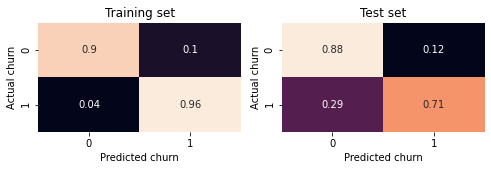

In [373]:
### SELECT BEST ESTIMATOR###
xgb_best = model_cv_xgb.best_estimator_
print("\n Best Estimator:",xgb_best)
xgb_best.fit(Xtrain_reduced, y_train)

### PREDICT Churn rate ###
y_train_pred = xgb_best.predict(Xtrain_reduced)
y_test_pred = xgb_best.predict(Xtest_reduced)

model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred)

### <font color='green'> ***6.4.2 RandomForest*** </font>

Random forest classifier is an ensemble of Decision Tree classifier with bootstrapped agregation (bagging) method. Following hyper parameters are tuned for getting the best results based on evaluation criteria 

#### **Hyper parameter tuning:**
**n_estimators** represents number of trees in the foreset

'n_estimators': range(100,200,300)
 
**max_depth** , max number of levels in each decision tree, trucation parameter which limits the growth of the tree

'max_depth': [5,8, 10, 12]

**min_samples_split** ,The minimum number of samples required to split an internal node:

'min_samples_split': [500,750,1000]

**class_weight:**
- Imbalance in classes is handled by `class_weight` parameter
- Prediction accuracy of churn customer is more important than prediction accuracy of non-churn customers, so this pupose class_weight' : `[ {0:1, 1:16} ]` is used instead of `balanced` option

In [375]:
# Create the parameter grid based on the results of random search 
param_grid = { 
            # 'max_depth': [ 5,8, 10, 12],
              'max_depth': [10],
            #'min_samples_split': [500,750,1000],
             'min_samples_split': [750],     
            #'class_weight' : ['balanced', {0:1, 1:16}] ,      
             'class_weight' : [ {0:1, 1:16} ]  ,
            # 'n_estimators': range(100,500,100)
             'n_estimators': [200]
            }

#class_weight='balanced_subsample'
#folds = 5
folds = StratifiedKFold(n_splits=5)
scoring = ['recall','precision', 'accuracy', 'f1']

rf = RandomForestClassifier( random_state=42)
model_cv = GridSearchCV(estimator = rf, param_grid = param_grid,scoring=scoring, refit='recall', cv = folds, n_jobs=-1,verbose =3, return_train_score=True)
model_cv.fit(Xtrain_reduced, y_train)
cv_result =pd.DataFrame(model_cv.cv_results_)
display(cv_result)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      27.063612      0.299769         0.209862        0.028024   

  param_class_weight param_max_depth param_min_samples_split  \
0      {0: 1, 1: 16}              10                     750   

  param_n_estimators                                             params  \
0                200  {'class_weight': {0: 1, 1: 16}, 'max_depth': 1...   

   split0_test_recall  split1_test_recall  split2_test_recall  \
0            0.809375             0.84375             0.80625   

   split3_test_recall  split4_test_recall  mean_test_recall  std_test_recall  \
0             0.79375              0.8125          0.813125         0.016583   

   rank_test_recall  split0_train_recall  split1_train_recall  \
0                 1              0.84375                 0.85   

   split2_train_recall  split3_train_recall  split4_train_recall  \
0              0.85625             0.853906             0.845313   

   mean_train_recall  std_train_recall  split0_test_precision  \
0           0.849844          0.004801               0.280607   

   split1_test_precision  split2_test_precision  split3_test_precision  \
0               0.285714               0.292517               0.295349   

   split4_test_precision  mean_test_precision  std_test_precision  \
0               0.299194             0.290676             0.00669   

   rank_test_precision  split0_train_precision  split1_train_precision  \
0                    1                0.301255                0.296377   

   split2_train_precision  split3_train_precision  split4_train_precision  \
0                0.302178                0.297415                0.304789   

   mean_train_precision  std_train_precision  split0_test_accuracy  \
0              0.300403             0.003106              0.808657   

   split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  \
0              0.808657               0.81895              0.822644   

   split4_test_accuracy  mean_test_accuracy  std_test_accuracy  \
0               0.82339            0.816459           0.006546   

   rank_test_accuracy  split0_train_accuracy  split1_train_accuracy  \
0                   1               0.821511               0.816892   

   split2_train_accuracy  split3_train_accuracy  split4_train_accuracy  \
0               0.820851               0.817288               0.824096   

   mean_train_accuracy  std_train_accuracy  split0_test_f1  split1_test_f1  \
0             0.820128             0.00271        0.416734        0.426877   

   split2_test_f1  split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  \
0        0.429285        0.430508        0.437342      0.428149     0.006683   

   rank_test_f1  split0_train_f1  split1_train_f1  split2_train_f1  \
0             1         0.443988         0.439507         0.446709   

   split3_train_f1  split4_train_f1  mean_train_f1  std_train_f1  
0         0.441171         0.448033       0.443881      0.003216


------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.848
Test set: 0.801

------------Specificity (Non Churn Prediction Accuracy) score------------
train set: 0.819
test set: 0.818

------------Precision score------------
train set: 0.302
test set: 0.284

------------F1 score------------
train set: 0.445
test set: 0.42

------------Accuracy score------------
train set: 0.821
Test set: 0.817

------------Confusion Matrix------------


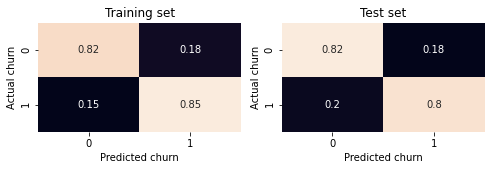

In [376]:
#--> Best estimator

clf_best = model_cv.best_estimator_
clf_best.fit(Xtrain_reduced, y_train)

y_train_pred = clf_best.predict(Xtrain_reduced)
y_pred = clf_best.predict(Xtest_reduced)

model_evaluation_plot(y_train,y_train_pred,y_test,y_pred)

### Handling class imbalance using SMOTE

In [377]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [378]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("After OverSampling, churn event rate : {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

After OverSampling, the shape of train_X: (34688, 103)
After OverSampling, the shape of train_y: (34688,) 

After OverSampling, counts of label '1': 17344
After OverSampling, counts of label '0': 17344
After OverSampling, churn event rate : 50.0% 



In [379]:
pca = PCA(0.95)
Xtrain_reduced = pca.fit_transform(X_train_res)
Xtest_reduced = pca.transform(X_test)
print(' No of components after PCA :', pca.n_components_)

 No of components after PCA : 47


#### Making the scree plot

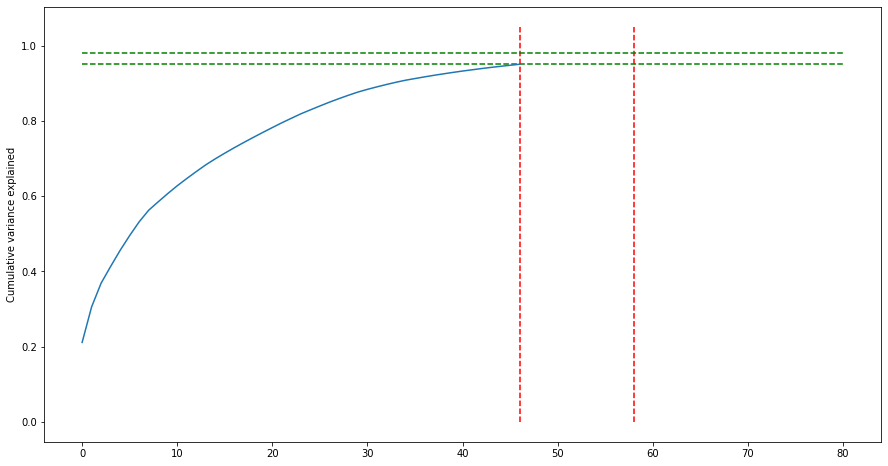

In [380]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_).round(4))
plt.vlines(x=46,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.vlines(x=58,ymin=0,ymax=1.05,color='r',linestyles='dashed')
plt.hlines(y=0.95,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.hlines(y=0.98,xmin=0,xmax=80,color='g',linestyles='dashed')
plt.ylabel("Cumulative variance explained")
plt.show()

In [381]:
pca_incremetal = IncrementalPCA(n_components = 46)
Xtrain_reduced = pca_incremetal.fit_transform(X_train_res)
Xtest_reduced = pca_incremetal.transform(X_test)

### <font color='green'> ***6.4.3 Random Forest Model with Incremental PCA*** </font>

In [382]:
# Create the parameter grid based on the results of random search 
param_grid = { 
            # 'max_depth': [ 8, 10, 12],
            'criterion':['gini','entropy'],
            #'min_samples_split': [500,750,1000],
             'min_samples_split': [750]     
            #'class_weight' : ['balanced', {0:1, 1:16}] ,      
            # 'n_estimators': range(100,500,100)
            }


#folds = 5
folds = StratifiedKFold(n_splits=5)
scoring = ['recall']

rf = RandomForestClassifier( random_state=42,class_weight='balanced',max_depth=10,n_estimators=200)
model_cv = GridSearchCV(estimator = rf, param_grid = param_grid,scoring=scoring, refit='recall', cv = folds,n_jobs=-1, verbose =3, return_train_score=True)
model_cv.fit(Xtrain_reduced, y_train_res)
cv_result =pd.DataFrame(model_cv.cv_results_)
display(cv_result)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      56.714060      1.270883         0.360433        0.020116   
1      86.410428      4.114996         0.333502        0.048363   

  param_criterion param_min_samples_split  \
0            gini                     750   
1         entropy                     750   

                                              params  split0_test_recall  \
0    {'criterion': 'gini', 'min_samples_split': 750}            0.796483   
1  {'criterion': 'entropy', 'min_samples_split': ...            0.798501   

   split1_test_recall  split2_test_recall  split3_test_recall  \
0            0.840300            0.847795            0.833045   
1            0.842029            0.849524            0.836217   

   split4_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0            0.840876           0.83170         0.018217                 2   
1            0.842029           0.83366         0.018080                 1   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0             0.844252             0.835387             0.832505   
1             0.845045             0.836396             0.833441   

   split3_train_recall  split4_train_recall  mean_train_recall  \
0             0.839147             0.835315           0.837321   
1             0.839219             0.837333           0.838287   

   std_train_recall  
0          0.004058  
1          0.003860


 Best Estimator: RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_split=750, n_estimators=200,
                       random_state=42)

------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.841
Test set: 0.728

------------Specificity (Non Churn Prediction Accuracy) score------------
train set: 0.886
test set: 0.878

------------Precision score------------
train set: 0.88
test set: 0.349

------------F1 score------------
train set: 0.86
test set: 0.471

------------Accuracy score------------
train set: 0.863
Test set: 0.865

------------Confusion Matrix------------


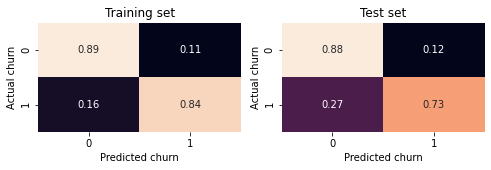

In [383]:
#--> Best estimator ###

rf2_best = model_cv.best_estimator_
print("\n Best Estimator:",rf2_best)
rf2_best.fit(Xtrain_reduced, y_train_res)

### PREDICT Churn rate ###
y_train_pred = rf2_best.predict(Xtrain_reduced)
y_test_pred = rf2_best.predict(Xtest_reduced)

model_evaluation_plot(y_train_res,y_train_pred,y_test,y_test_pred)

### Define functions for Graphs and Plots

**draw_roc**: This function is used to plot ROC curve<br>
**getModelMetrics**: This function is used to plot calulate the Model metrics <br>
**predictChurnWithProb**: This function is to predict the churn using the input probability cut-off<br>
**findOptimalCutoff**: This function is to find the optimal cutoff for classifing as churn/non-churn<br>
**modelfit**: This function is find the optimal cutoff for classifing as churn/non-churn<br>

In [384]:
#--> ROC curve definition of function for the ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [385]:
#--> Definition of function for the Model Metrics

def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [386]:
#--> Function to predict the churn using the input probability cut-off

def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [387]:
#--> Function to find the optimal cutoff for classifing as churn/non-churn

def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [388]:
#--> Function to fit the model

def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

#### Predicting churn with initial cut-off Probabilty=0.5

In [389]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf2_best,Xtrain_reduced,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8632380073800738
Sensitivity/Recall : 0.8408671586715867
Specificity: 0.8856088560885609
False Positive Rate: 0.11439114391143912
Positive predictive value: 0.8802510864316755
Negative Predictive value: 0.847682119205298
sklearn precision score value: 0.8802510864316755


churn  churn_Prob  final_predicted
0    0.0    0.252484                0
1    0.0    0.176592                0
2    0.0    0.170525                0
3    0.0    0.646450                1
4    0.0    0.181482                0

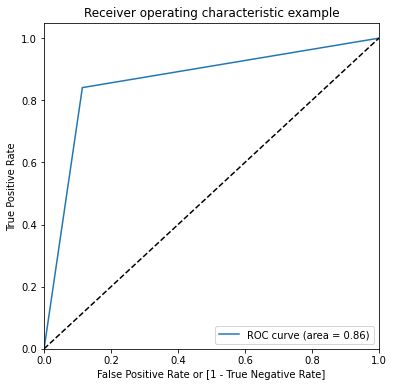

roc_auc_score : 0.86


In [390]:
#--> ROC curve
draw_roc(y_train_df.churn, y_train_df.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))


#### Finding optimal cut-off Probability

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.504151  1.000000  0.008303
0.2   0.2  0.700905  0.997982  0.403828
0.3   0.3  0.858164  0.967309  0.749020
0.4   0.4  0.870099  0.902041  0.838157
0.5   0.5  0.863238  0.840867  0.885609
0.6   0.6  0.862575  0.790821  0.934329
0.7   0.7  0.815729  0.664091  0.967366
0.8   0.8  0.717309  0.446552  0.988065
0.9   0.9  0.583372  0.169223  0.997521


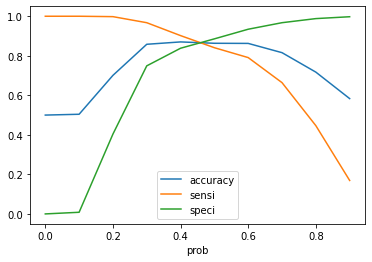

In [391]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

**As per the above graph 0.45 seems to be the optimal threshold** 

In [392]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(rf2_best,Xtrain_reduced,y_train_res,cut_off_prob)


Roc_auc_score : 0.8647659132841329
Sensitivity/Recall : 0.8679658671586716
Specificity: 0.8615659594095941
False Positive Rate: 0.1384340405904059
Positive predictive value: 0.8624462904611859
Negative Predictive value: 0.8671154180931933
sklearn precision score value: 0.8624462904611859


churn  churn_Prob  final_predicted
0        0.0    0.252484                0
1        0.0    0.176592                0
2        0.0    0.170525                0
3        0.0    0.646450                1
4        0.0    0.181482                0
...      ...         ...              ...
34683    1.0    0.671904                1
34684    1.0    0.730281                1
34685    1.0    0.826902                1
34686    1.0    0.864586                1
34687    1.0    0.919489                1

[34688 rows x 3 columns]

In [393]:
# predicting with the choosen cut-off on test
predictChurnWithProb(rf2_best,Xtest_reduced,y_test,cut_off_prob)

Roc_auc_score : 0.814812566246496
Sensitivity/Recall : 0.7731343283582089
Specificity: 0.8564908041347832
False Positive Rate: 0.14350919586521682
Positive predictive value: 0.3264020163831128
Negative Predictive value: 0.9767299448867116
sklearn precision score value: 0.3264020163831128


churn  churn_Prob  final_predicted
0       1.0    0.796265                1
1       0.0    0.139793                0
2       0.0    0.709057                1
3       0.0    0.134023                0
4       0.0    0.495330                1
...     ...         ...              ...
8114    0.0    0.156070                0
8115    0.0    0.142719                0
8116    0.0    0.211849                0
8117    0.0    0.409431                0
8118    0.0    0.133150                0

[8119 rows x 3 columns]


### <font color='green'> ***6.4.4 Logistic Regression*** </font>

In [394]:
#-->  Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(class_weight='balanced')

In [395]:
modelfit(lr, Xtrain_reduced, y_train_res)


Model Report
Accuracy : 0.8653
Recall/Sensitivity : 0.868
AUC Score (Train): 0.929641
CV Score : Mean - 0.9283753 | Std - 0.01466852 | Min - 0.8993707 | Max - 0.937745


In [396]:
#--> predictions on Test data

pred_probs_test = lr.predict(Xtest_reduced)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.7949318049302421
Sensitivity/Recall : 0.7328358208955223
Specificity: 0.8570277889649618
False Positive Rate: 0.14297221103503827
Positive predictive value: 0.31555269922879176
Negative Predictive value: 0.9727258875514246
sklearn precision score value: 0.31555269922879176


In [397]:
#--> Model Metrics
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.8467791599950732
Recall : 0.7328358208955223
Precision : 0.31555269922879176


In [398]:
#--> Making prediction on the test data
pred_probs_train = lr.predict_proba(Xtrain_reduced)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.93


In [399]:
#--> Initial threshold for LR 
cut_off_prob=0.5
y_train_df = predictChurnWithProb(lr,Xtrain_reduced,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8652559963099631
Sensitivity/Recall : 0.8680235239852399
Specificity: 0.8624884686346863
False Positive Rate: 0.13751153136531366
Positive predictive value: 0.8632454128440367
Negative Predictive value: 0.867288961038961
sklearn precision score value: 0.8632454128440367


churn  churn_Prob  final_predicted
0    0.0    0.292410                0
1    0.0    0.128797                0
2    0.0    0.026307                0
3    0.0    0.929073                1
4    0.0    0.191445                0

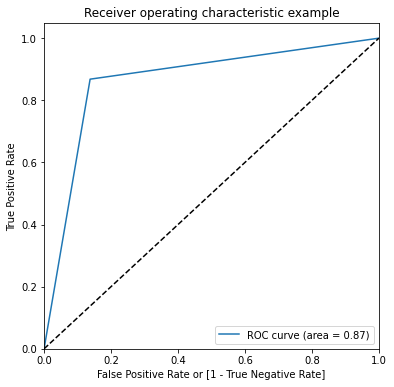

roc_auc_score : 0.87


In [400]:
#--> ROC curve
draw_roc(y_train_df.churn, y_train_df.final_predicted)
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.735442  0.973247  0.497636
0.2   0.2  0.803938  0.945803  0.662073
0.3   0.3  0.837350  0.921471  0.753229
0.4   0.4  0.856752  0.897140  0.816363
0.5   0.5  0.865256  0.868024  0.862488
0.6   0.6  0.865602  0.831527  0.899677
0.7   0.7  0.850698  0.772025  0.929370
0.8   0.8  0.815729  0.675853  0.955604
0.9   0.9  0.733770  0.488815  0.978725


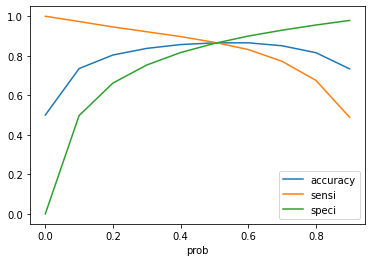

In [401]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

In [402]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.45
predictChurnWithProb(lr,Xtrain_reduced,y_train_res,cut_off_prob)

Roc_auc_score : 0.8623154981549815
Sensitivity/Recall : 0.8844557195571956
Specificity: 0.8401752767527675
False Positive Rate: 0.15982472324723246
Positive predictive value: 0.846952296819788
Negative Predictive value: 0.8791023166023166
sklearn precision score value: 0.846952296819788


churn  churn_Prob  final_predicted
0        0.0    0.292410                0
1        0.0    0.128797                0
2        0.0    0.026307                0
3        0.0    0.929073                1
4        0.0    0.191445                0
...      ...         ...              ...
34683    1.0    0.974286                1
34684    1.0    0.945711                1
34685    1.0    0.908458                1
34686    1.0    0.819266                1
34687    1.0    0.956217                1

[34688 rows x 3 columns]

In [403]:
# predicting with the choosen cut-off on test
predictChurnWithProb(lr,Xtest_reduced,y_test,cut_off_prob)

Roc_auc_score : 0.7983120042157317
Sensitivity/Recall : 0.7626865671641792
Specificity: 0.8339374412672842
False Positive Rate: 0.1660625587327158
Positive predictive value: 0.2923340961098398
Negative Predictive value: 0.9750431643384084
sklearn precision score value: 0.2923340961098398


churn  churn_Prob  final_predicted
0       1.0    0.730435                1
1       0.0    0.029667                0
2       0.0    0.593483                1
3       0.0    0.020988                0
4       0.0    0.162372                0
...     ...         ...              ...
8114    0.0    0.171375                0
8115    0.0    0.005511                0
8116    0.0    0.014528                0
8117    0.0    0.079970                0
8118    0.0    0.004559                0

[8119 rows x 3 columns]

**<font color='green'>Model Evaluation and Analysis:</font>**
- Based on `Recall/Sensitivity` and `F1` score **Random Forest** with `class_weight` balance seems to be performing better with best metrics

## 6.5 Model Building without PCA

- We will derive a model without PCA to identifying `important churn indicators` and `business recommendation`


### <font color='green'> ***6.5.1 RandomForest*** </font>

#### **Hyper parameter tuning:**

Random forest classifier is an ensemble of Decision Tree classifier with bootstrapped agregation (bagging) method. Following hyper parameters are tuned for getting the best results based on evaluation criteria 

**n_estimators** represents number of trees in the foreset

'n_estimators': range(100,500,100)
 
**max_features** , max number of features considered for splitting a node

'max_features': ['sqrt', 30,50,100,200]

**max_depth** , max number of levels in each decision tree, trucation parameter which limits the growth of the tree

'max_depth': [ 5, 8, 10, 12]

**min_samples_leaf** , min number of data points allowed in a leaf node, trucation parameter which limits the growth of the tree

'min_samples_leaf': range(50,500 ,50)

**class_weight:**
- Imbalance in classes is handled by `class_weight` parameter
- Prediction accuracy of churn customer is more important than prediction accuracy of non-churn customers, so this pupose class_weight' : `[ {0:1, 1:16} ]` is used instead of `balanced` option

In [405]:
# hyperparameter tuning with Random Forest

# specify range of hyperparameters
param_grid = {
    
    #  'max_depth': [ 8, 10, 12],
      'max_depth': [10],
    # 'max_features': ['sqrt', 30,50,100,200],
     'max_features': [100],
    # 'min_samples_leaf': range(50,100 ,50),
     'min_samples_leaf': [100],     
    # 'class_weight' : ['balanced', {0:1, 1:16}] ,           
     'class_weight' : [ {0:1, 1:16} ]  ,
    # 'n_estimators': range(100,500,50)
     'n_estimators': [200]
   
}

# specify model
folds = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
scoring = ['recall','precision', 'accuracy', 'f1']
rf2 = RandomForestClassifier( random_state=42,oob_score=True)

# set up GridSearchCV()

model_cv_rf2 = GridSearchCV(estimator = rf2,
                        param_grid = param_grid, 
                        scoring= scoring, 
                        refit='recall',
                        cv = folds,
                        verbose = 3,
                        n_jobs=-1,
                        return_train_score=True)                         
                
model_cv_rf2.fit(X_train, y_train)
cv_result_rf2 =pd.DataFrame(model_cv_rf2.cv_results_)
display(cv_result_rf2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0     137.887865      1.751437         0.250005        0.016748   

  param_class_weight param_max_depth param_max_features  \
0      {0: 1, 1: 16}              10                100   

  param_min_samples_leaf param_n_estimators  \
0                    100                200   

                                              params  split0_test_recall  \
0  {'class_weight': {0: 1, 1: 16}, 'max_depth': 1...            0.865625   

   split1_test_recall  split2_test_recall  split3_test_recall  \
0            0.909375            0.846875              0.8625   

   split4_test_recall  mean_test_recall  std_test_recall  rank_test_recall  \
0             0.86875          0.870625         0.020785                 1   

   split0_train_recall  split1_train_recall  split2_train_recall  \
0             0.902344             0.903125               0.9125   

   split3_train_recall  split4_train_recall  mean_train_recall  \
0             0.909375             0.911719           0.907813   

   std_train_recall  split0_test_precision  split1_test_precision  \
0          0.004279               0.336574                0.34976   

   split2_test_precision  split3_test_precision  split4_test_precision  \
0               0.325721               0.327402               0.336155   

   mean_test_precision  std_test_precision  rank_test_precision  \
0             0.335122            0.008549                    1   

   split0_train_precision  split1_train_precision  split2_train_precision  \
0                0.347368                0.350728                0.348969   

   split3_train_precision  split4_train_precision  mean_train_precision  \
0                0.351343                0.347735              0.349229   

   std_train_precision  split0_test_accuracy  split1_test_accuracy  \
0              0.00158               0.84455              0.849565   

   split2_test_accuracy  split3_test_accuracy  split4_test_accuracy  \
0              0.839008              0.838744              0.843981   

   mean_test_accuracy  std_test_accuracy  rank_test_accuracy  \
0            0.843169           0.004009                   1   

   split0_train_accuracy  split1_train_accuracy  split2_train_accuracy  \
0               0.848565                0.85061               0.848829   

   split3_train_accuracy  split4_train_accuracy  mean_train_accuracy  \
0               0.850544               0.848113             0.849332   

   std_train_accuracy  split0_test_f1  split1_test_f1  split2_test_f1  \
0            0.001042        0.484689        0.505208        0.470486   

   split3_test_f1  split4_test_f1  mean_test_f1  std_test_f1  rank_test_f1  \
0        0.474635        0.484743      0.483952      0.01201             1   

   split0_train_f1  split1_train_f1  split2_train_f1  split3_train_f1  \
0         0.501629         0.505245         0.504863         0.506858   

   split4_train_f1  mean_train_f1  std_train_f1  
0         0.503451       0.504409      0.001764


 Best Estimator: RandomForestClassifier(class_weight={0: 1, 1: 16}, max_depth=10,
                       max_features=100, min_samples_leaf=100, n_estimators=200,
                       oob_score=True, random_state=42)

------------Recall/Sensitivity (Churn Prediction Accuracy) score------------
train set: 0.91
Test set: 0.846

------------Specificity (Non Churn Prediction Accuracy) score------------
train set: 0.847
test set: 0.836

------------Precision score------------
train set: 0.355
test set: 0.317

------------F1 score------------
train set: 0.51
test set: 0.461

------------Accuracy score------------
train set: 0.853
Test set: 0.837

------------Confusion Matrix------------


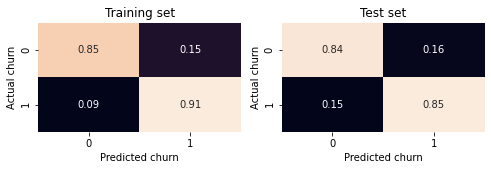

In [406]:
### SELECT BEST ESTIMATOR###
rf2_best = model_cv_rf2.best_estimator_
print("\n Best Estimator:",rf2_best)
rf2_best.fit(X_train, y_train)

### PREDICT Churn rate ###
y_train_pred = rf2_best.predict(X_train)
y_test_pred = rf2_best.predict(X_test)

model_evaluation_plot(y_train,y_train_pred,y_test,y_test_pred)

**<font color='green'>Model Comaprison and Analysis:</font>**

As observed, RandomForest without PCA is giving best results as compared to all the models with PCA. It may be because of below shortcomings of PCA technique.
- PCA produces the components to be perpendicular or orthogonal, though in some cases, that may not be the best solution. The alternative technique is to use Independent Components Analysis. 
- PCA assumes that columns with low variance are not useful, which might not be true in prediction setups (especially classification problem with a high class imbalance).

### 6.6 Identify Important churn indicators: 

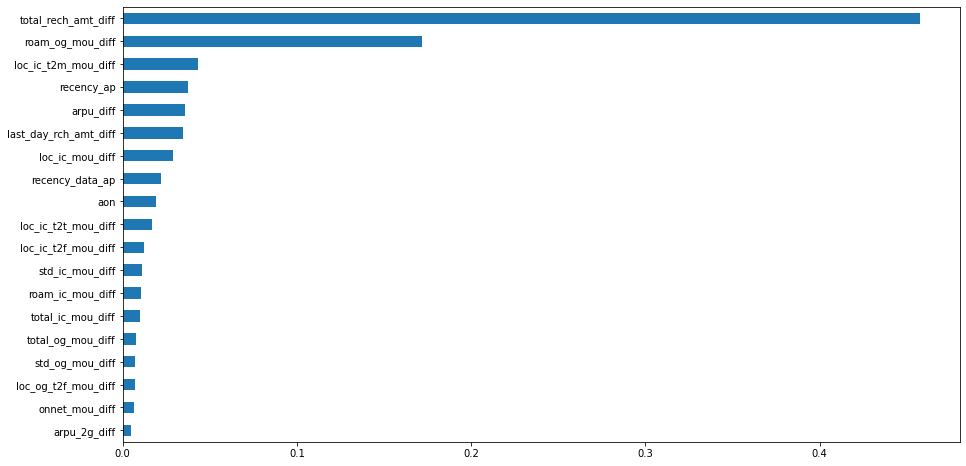

In [407]:
features = X_train.columns.tolist()
importance = rf2_best.feature_importances_
rf_coefs = pd.Series(importance,index=features)

plt.figure(figsize=(15,8))
rf_coefs[(rf_coefs>0.005)].sort_values().plot.barh()
plt.show()

## 7. Conclusions  

***7.1 Type I & Type II Error***
- The prediction model gives more importance for the reduction of `Type II Error` (missing to identify potential churn behaviour) because loosing high value customers can cause significant decline in the company revenue. 
- Although `Type I Error` (incorrectly identifing non-churn behaviour as churn) is relatively high, giving competitive offers to them will help company in longer run to generate more revenue as current focus is only on high value customers.

***7.2 Inferences & Strategies***

Below are the important churn indicator features and actionable recommendation based on the prediction model derived:

- A sudden reduction in total recharge amount(`total_rech_amnt_x`) or average revenue per user(`arpu_x`) generated from the user indicates a tendency of churn. This might due to unsatisfactory service quality or attractive offer from competitors, customer feedback needs to be collected and competitive offers need to be given based on customer value.


- An increased usage of roaming service(`roam_og_mou_x`, `roam_ic_mou_x`) leads to higher churn rate. This can be due to higher roaming charges and suggesting attractive roaming packages may reduce churn


- The derived recharge recency feature for voice and data (`recency_ap_x`, `recency_data_ap_x`) shows that customers are likely to churn if they do not charge for a period of 30-40 days. The recharge recency of customers needs to be regularly monitored and customer needs to be approached to get the customer feedback and concerns.


- Old customers are less likely to churn since they have developed trust over the service provider. New customers with Age on the network (`aon`)less than 2 years are more likely to churn and offering attractive packages at the initial months will develop loyalty and are like to continue with the service. 


- If there is a reduction in minutes of usage (incoming/outgoing calls in total/std/local for onnet/offnet), the customer shows a tendency of churn, and minutes of usage shall be tracked regularly. 
    (`total_og_mou_x, total_ic_mou_x, loc_ic_mou_x, loc_ic_t2m_mou_x, std_og_mou_x, std_ic_mou_x ....`)
    

## 8. Business Insights

* Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
* The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.
* To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint data and work on their services according to the needs of customers. 